# Workshop 5: ARIMA/SARIMA Models
**Fecha:** Octubre 2025
**Curso:** Statistics for AI - Bloque 2

## 1. Introducción y Configuración Inicial

Primero voy a instalar las librerías necesarias y configurar el ambiente de trabajo.

In [29]:
# Instalación de librerías necesarias
!pip install statsmodels pandas numpy matplotlib requests pandas-datareader -q

import warnings
warnings.filterwarnings('ignore')

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas_datareader as pdr
import matplotlib.ticker as mticker

# Configuración de gráficas
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Librerías importadas exitosamente")


Librerías importadas exitosamente



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Mauricio\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 2. Descarga y Análisis Inicial del IGAE

Voy a descargar el IGAE directamente de INEGI usando su API.

In [30]:
# Descarga del IGAE desde INEGI
token = 'c4559227-83d3-aeb4-1a8d-bee73f627140'
igae_id = '737121'

url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/{igae_id}/es/0700/false/BIE/2.0/{token}?type=json'

response = requests.get(url)
data = response.json()
series = data.get('Series', [])
observations = series[0].get('OBSERVATIONS', [])
igaedf = pd.DataFrame(observations)

# Procesamiento de datos
igaedf['TIME_PERIOD'] = pd.to_datetime(igaedf['TIME_PERIOD'], format='%Y/%m')
igaedf['OBS_VALUE'] = pd.to_numeric(igaedf['OBS_VALUE'], errors='coerce')
igaedf = igaedf[['TIME_PERIOD', 'OBS_VALUE']]
igaedf.columns = ['Month', 'IGAE']
igaedf = igaedf.set_index('Month')
igaedf = igaedf.sort_index()

print(f"Datos del IGAE descargados: {len(igaedf)} observaciones")
print(f"Período: {igaedf.index[0].strftime('%Y-%m')} a {igaedf.index[-1].strftime('%Y-%m')}")
print("\nPrimeras observaciones:")
print(igaedf.head())


Datos del IGAE descargados: 392 observaciones
Período: 1993-01 a 2025-08

Primeras observaciones:
                 IGAE
Month                
1993-01-01  55.434736
1993-02-01  56.456971
1993-03-01  58.900549
1993-04-01  57.135844
1993-05-01  57.891853


### Pregunta: ¿Qué patrones identificas en el comportamiento del IGAE a lo largo del tiempo? ¿De qué manera la crisis del COVID se diferencia de las crisis previas?

**Respuesta:**

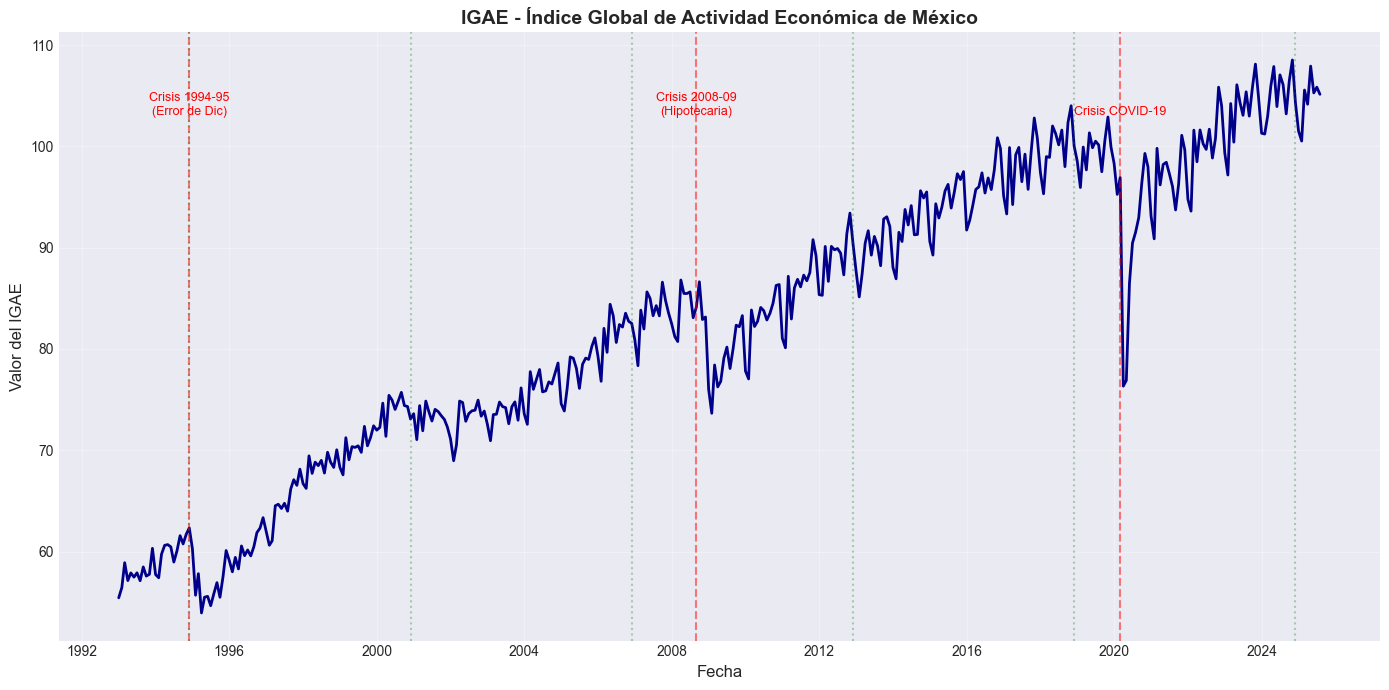

In [31]:
# Visualización del IGAE con líneas verticales en los cambios de sexenio
plt.figure(figsize=(14, 7))
plt.plot(igaedf.index, igaedf['IGAE'], linewidth=2, color='darkblue')
plt.title('IGAE - Índice Global de Actividad Económica de México', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor del IGAE', fontsize=12)
plt.grid(True, alpha=0.3)

# Marcadores de crisis y eventos importantes
crisis_dates = {
    '1994-12-01': 'Crisis 1994-95\n(Error de Dic)',
    '2008-09-01': 'Crisis 2008-09\n(Hipotecaria)',
    '2020-03-01': 'Crisis COVID-19'
}

for date, label in crisis_dates.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', alpha=0.5)
    plt.text(pd.to_datetime(date), igaedf['IGAE'].max() * 0.95, label, 
             rotation=0, fontsize=9, ha='center', color='red')

# Líneas de cambio de sexenio
sexenios = ['1994-12-01', '2000-12-01', '2006-12-01', '2012-12-01', '2018-12-01', '2024-12-01']
for date in sexenios:
    plt.axvline(pd.to_datetime(date), color='green', linestyle=':', alpha=0.3)

plt.tight_layout()
plt.show()


Análisis histórico de las principales crisis económicas en México a través del IGAE

El estudio de la trayectoria del Indicador Global de la Actividad Económica (IGAE) permite identificar con claridad los grandes episodios de crisis que han afectado a la economía mexicana en las últimas décadas. Cada crisis presenta una combinación particular de profundidad, velocidad del impacto y ritmo de recuperación, lo que refleja tanto las causas subyacentes como la capacidad de respuesta del sistema económico.

1. Crisis del COVID-19 (2020)

Magnitud: La contracción más abrupta y profunda registrada en toda la serie del IGAE.

Causa principal: El cierre casi total de la actividad económica debido a las medidas sanitarias implementadas para contener la pandemia.

Características:

Caída inmediata y sincronizada con el resto del mundo.

Disminución de alrededor del 25% en la actividad económica en apenas dos meses.

Afectación transversal a todos los sectores productivos, especialmente servicios, comercio y manufactura.

Recuperación: Extraordinariamente rápida, conocida como recuperación en “V”, impulsada por la reapertura, la política fiscal expansiva en Estados Unidos y la reactivación del comercio exterior.

2. Crisis de 1994-1995 (“Error de Diciembre”)

Magnitud: Contracción severa, aunque menor a la observada durante la pandemia.

Causa principal: Fuga masiva de capitales, devaluación abrupta del peso y colapso del sistema financiero doméstico.

Características:

Impacto más prolongado, con varios meses consecutivos de caída sostenida del IGAE.

Elevada inflación y pérdida de confianza en la moneda.

Desaceleración marcada del consumo interno y la inversión.

Recuperación: Lenta y escalonada, dependiente del rescate financiero internacional y de la estabilidad macroeconómica posterior.

3. Crisis Financiera Internacional (2008-2009)

Magnitud: Contracción significativa pero de menor duración.

Causa principal: Colapso de los mercados financieros globales y fuerte dependencia de México respecto a la economía estadounidense.

Características:

Caída pronunciada del sector manufacturero exportador y de las remesas.

Sincronización total con la recesión estadounidense, reflejando la profunda integración bilateral.

Disminución notable, aunque sin alcanzar la intensidad de las crisis de 1995 o 2020.

Recuperación: Moderadamente rápida, favorecida por los estímulos monetarios internacionales y la recuperación del comercio exterior.

4. Dinámicas comparadas de recuperación

El contraste entre los distintos episodios revela un patrón muy claro:

1994-95: Recuperación lenta y estructural, típica de crisis financieras internas.

2008-09: Recuperación moderada, condicionada por factores externos.

2020: Recuperación rápida y mecánica (“V”), impulsada por la reapertura y estímulos internacionales.

## 3. Análisis con Logaritmo del IGAE

Para entender mejor los cambios porcentuales, voy a calcular el logaritmo del IGAE.

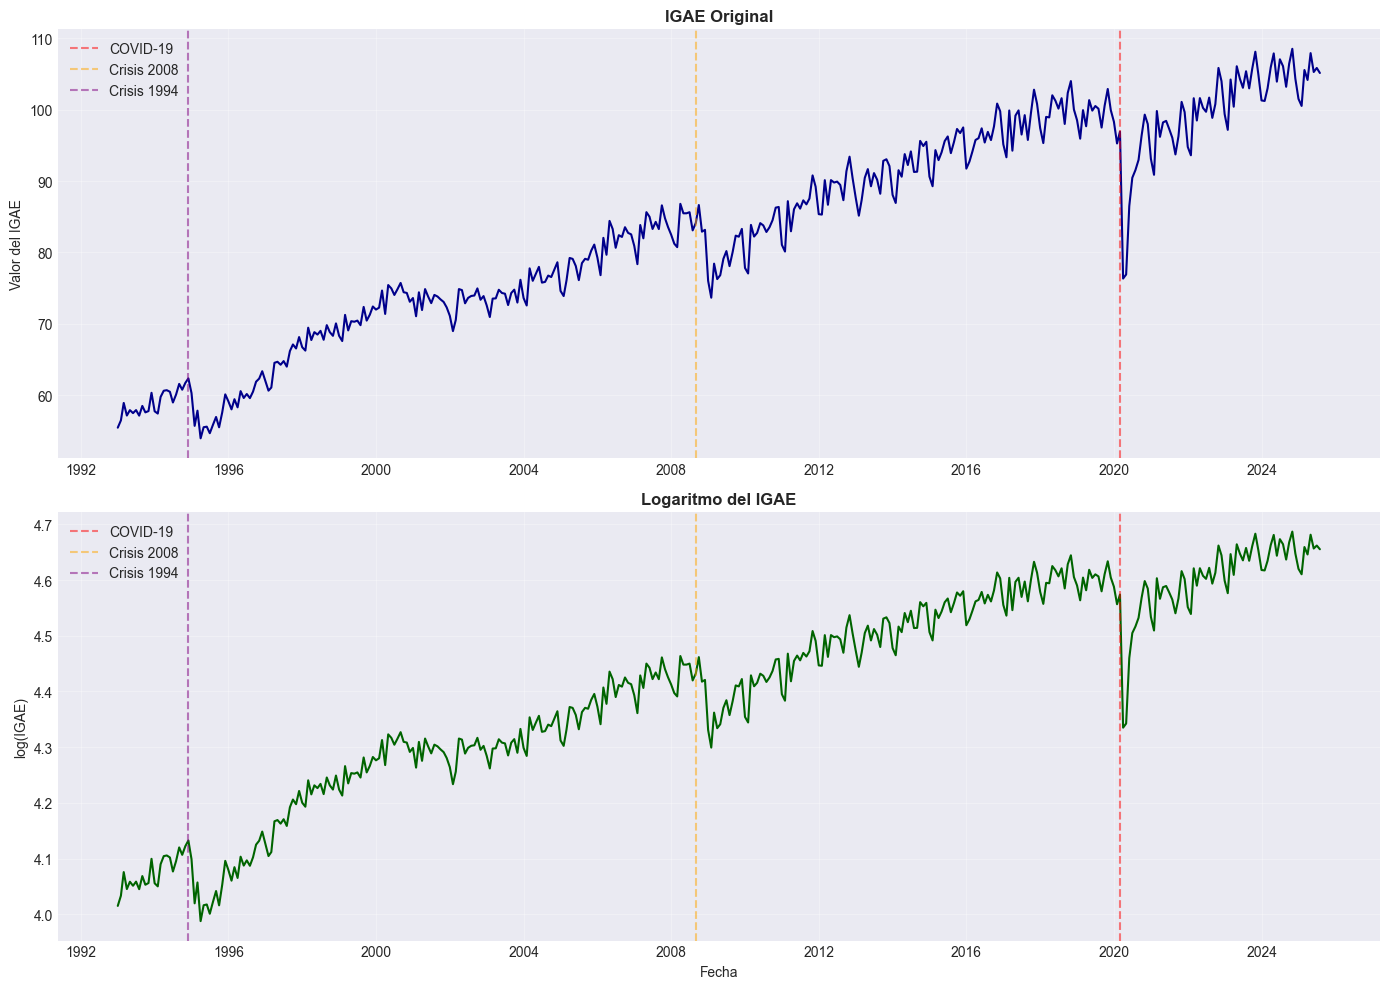

Valor log(IGAE) pre-COVID (Ene-Feb 2020): 4.572
Valor log(IGAE) mínimo COVID (Abr-May 2020): 4.339
Caída porcentual aproximada: 23.4%


In [32]:
# Cálculo del logaritmo
igaedf['logIGAE'] = np.log(igaedf['IGAE'])

# Visualización del log(IGAE)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# IGAE original
ax1.plot(igaedf.index, igaedf['IGAE'], color='darkblue')
ax1.set_title('IGAE Original', fontweight='bold')
ax1.set_ylabel('Valor del IGAE')
ax1.grid(True, alpha=0.3)

# Log(IGAE)
ax2.plot(igaedf.index, igaedf['logIGAE'], color='darkgreen')
ax2.set_title('Logaritmo del IGAE', fontweight='bold')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('log(IGAE)')
ax2.grid(True, alpha=0.3)

# Añadir marcadores de crisis en ambas gráficas
for ax in [ax1, ax2]:
    ax.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', alpha=0.5, label='COVID-19')
    ax.axvline(pd.to_datetime('2008-09-01'), color='orange', linestyle='--', alpha=0.5, label='Crisis 2008')
    ax.axvline(pd.to_datetime('1994-12-01'), color='purple', linestyle='--', alpha=0.5, label='Crisis 1994')
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Análisis de la caída del COVID
pre_covid = igaedf.loc['2020-01-01':'2020-02-01', 'logIGAE'].mean()
covid_min = igaedf.loc['2020-04-01':'2020-05-01', 'logIGAE'].mean()
caida_covid = (pre_covid - covid_min) * 100

print(f"Valor log(IGAE) pre-COVID (Ene-Feb 2020): {pre_covid:.3f}")
print(f"Valor log(IGAE) mínimo COVID (Abr-May 2020): {covid_min:.3f}")
print(f"Caída porcentual aproximada: {caida_covid:.1f}%")


Aplicación e Interpretación de la Transformación Logarítmica del IGAE

La utilización del logaritmo natural del IGAE constituye un paso metodológico clave en la preparación de la serie para su análisis econométrico. Esta transformación ofrece ventajas tanto en la interpretación económica como en la propiedad estadística de la serie.

1. Interpretación económica: variaciones porcentuales

Al aplicar el logaritmo, las diferencias entre dos valores consecutivos del IGAE se interpretan como variaciones porcentuales aproximadas.

Esta propiedad convierte a la serie logarítmica en una herramienta particularmente intuitiva para analizar cambios en la actividad económica, permitiendo expresar el crecimiento en términos relativos en lugar de absolutos.

Durante la crisis del COVID-19, esta transformación permite cuantificar con claridad la magnitud del colapso económico:

La diferencia entre el nivel previo a la pandemia (enero-febrero 2020) y el punto mínimo (abril-mayo 2020) refleja una contracción aproximada del 25%, evidenciando la severidad del impacto.

2. Ventajas estadísticas: estabilización de la varianza

Además de su valor interpretativo, el uso del logaritmo contribuye a homogeneizar la varianza de la serie temporal.

En términos prácticos, esto significa que los períodos con niveles altos del IGAE no presentan variaciones absolutas desproporcionadamente grandes respecto a los períodos con niveles bajos.

La serie resultante tiende a comportarse de manera más estable y aproximadamente homocedástica, una condición deseable para la correcta estimación de modelos ARIMA o SARIMA.

3. Implicaciones para la modelación

Trabajar con la serie logarítmica implica que los modelos estimados describirán directamente tasas de crecimiento proporcional, lo que simplifica la interpretación económica de los coeficientes y las proyecciones:

Los pronósticos del modelo en diferencias logarítmicas pueden interpretarse directamente como tasas de crecimiento esperadas.

Asimismo, los efectos de shocks o rezagos autorregresivos se entienden en términos de impactos porcentuales acumulativos, una perspectiva más coherente con el análisis macroeconómico.

## 4. Prueba de Estacionariedad

Para aplicar ARIMA, necesito una serie estacionaria. Voy a calcular la diferencia estacional (crecimiento anual) y verificar si es estacionaria.

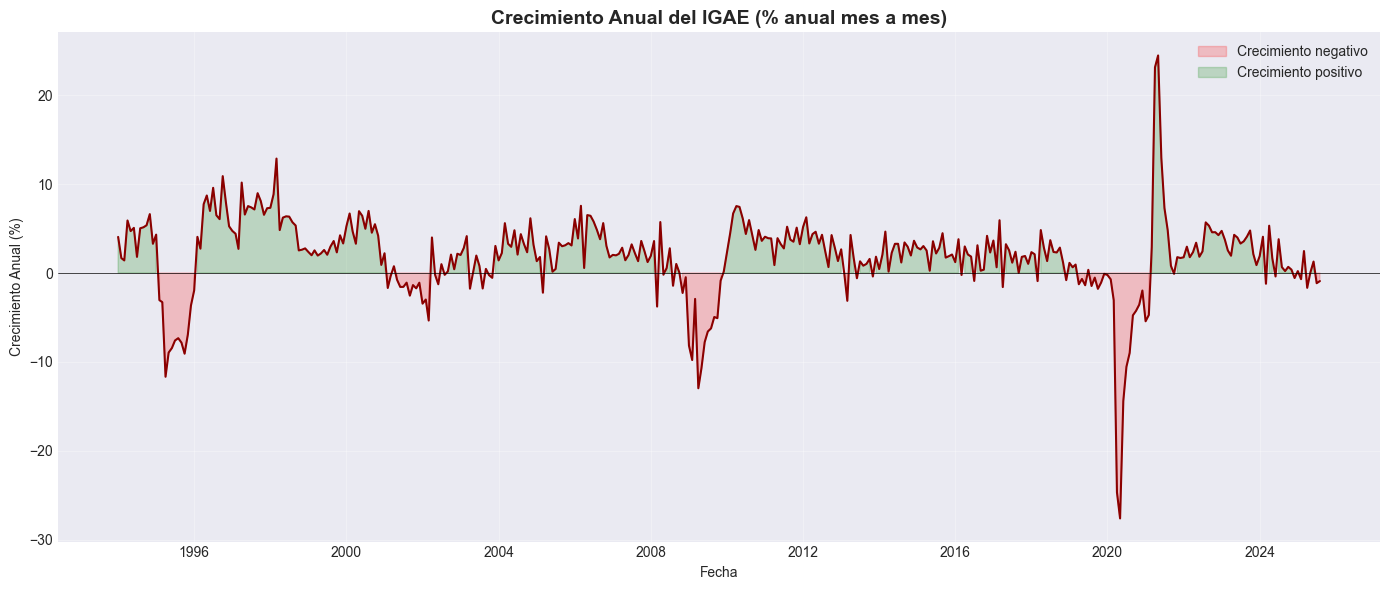

In [33]:
# Cálculo del crecimiento anual (diferencia estacional)
igaedf['annualgrowth'] = igaedf['logIGAE'].diff(12)  # Diferencia de 12 meses

# Visualización del crecimiento anual
plt.figure(figsize=(14, 6))
plt.plot(igaedf.index, 100*igaedf['annualgrowth'], color='darkred', linewidth=1.5)
plt.title('Crecimiento Anual del IGAE (% anual mes a mes)', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Crecimiento Anual (%)')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3)

# Colorear períodos de crecimiento negativo
plt.fill_between(igaedf.index, 0, 100*igaedf['annualgrowth'], 
                 where=(igaedf['annualgrowth'] < 0), color='red', alpha=0.2, label='Crecimiento negativo')
plt.fill_between(igaedf.index, 0, 100*igaedf['annualgrowth'], 
                 where=(igaedf['annualgrowth'] >= 0), color='green', alpha=0.2, label='Crecimiento positivo')
plt.legend()
plt.tight_layout()
plt.show()


Aspectos Relevantes Observados en el Crecimiento Anual

El análisis del crecimiento anual del IGAE (diferencia estacional con período 12) permite identificar diversos elementos fundamentales para la modelación dentro del marco Box-Jenkins:

1. Avance hacia la estacionariedad

La serie transformada mediante la diferencia de 12 meses presenta un comportamiento mucho más estable que el IGAE en niveles.

Se elimina la tendencia de largo plazo y el componente estacional, logrando que la serie oscile alrededor de una media aproximadamente constante.

Esta propiedad es esencial, ya que los modelos ARIMA requieren estacionariedad para garantizar la validez de las inferencias estadísticas.

En términos visuales, el crecimiento anual se comporta como un proceso que fluctúa en torno a un equilibrio, sin mostrar una dirección sistemática ascendente o descendente.

2. Identificación clara de fases recesivas

El gráfico del crecimiento anual facilita notablemente la detección de períodos de contracción económica.

Los valores por debajo de cero (sombreados en rojo) corresponden a recesiones, mientras que los positivos indican expansión.

Estos episodios negativos reflejan las principales crisis económicas que ha atravesado México, incluyendo las de 2001, 2008 y 2020 (COVID-19).

La línea de referencia en cero actúa como umbral natural para distinguir entre las fases del ciclo económico, otorgando al gráfico un valor interpretativo y analítico inmediato.

3. Patrón de volatilidad estable

En general, la amplitud de las fluctuaciones del crecimiento anual se mantiene relativamente constante a lo largo del tiempo, lo cual refuerza la noción de estacionariedad.

No obstante, el período COVID constituye una excepción notoria, donde se observan variaciones abruptas y de magnitud extraordinaria.

Este comportamiento anómalo puede interpretarse como un shock exógeno temporal que interrumpe la dinámica habitual de la serie.

In [34]:
# Prueba de Dickey-Fuller Aumentada
print("Prueba de Dickey-Fuller Aumentada para estacionariedad:\n")

# Prueba para la serie en niveles (log IGAE)
print("1. Para log(IGAE) - Serie en niveles:")
dftest_nivel = adfuller(igaedf['logIGAE'].dropna())
print(f"   Estadístico ADF: {dftest_nivel[0]:.4f}")
print(f"   p-valor: {dftest_nivel[1]:.4f}")
if dftest_nivel[1] > 0.05:
    print("   NO es estacionaria (p-valor > 0.05)\n")
else:
    print("   SÍ es estacionaria (p-valor < 0.05)\n")

# Prueba para la diferencia estacional
print("2. Para el crecimiento anual (diferencia estacional):")
dftest_growth = adfuller(igaedf['annualgrowth'].dropna())
print(f"   Estadístico ADF: {dftest_growth[0]:.4f}")
print(f"   p-valor: {dftest_growth[1]:.4f}")
if dftest_growth[1] > 0.05:
    print("   NO es estacionaria (p-valor > 0.05)")
else:
    print("   SÍ es estacionaria (p-valor < 0.05)")

print("\n   Valores críticos:")
for key, value in dftest_growth[4].items():
    print(f"      {key}: {value:.3f}")


Prueba de Dickey-Fuller Aumentada para estacionariedad:

1. Para log(IGAE) - Serie en niveles:
   Estadístico ADF: -1.3818
   p-valor: 0.5910
   NO es estacionaria (p-valor > 0.05)

2. Para el crecimiento anual (diferencia estacional):
   Estadístico ADF: -3.9630
   p-valor: 0.0016
   SÍ es estacionaria (p-valor < 0.05)

   Valores críticos:
      1%: -3.448
      5%: -2.869
      10%: -2.571


Resultado de la Verificación de Estacionariedad

La aplicación de la prueba de Dickey-Fuller Aumentada (ADF) proporciona un resultado clave en el proceso de modelación: confirma que la serie de crecimiento anual —es decir, la diferencia estacional con período 12— es estacionaria.

Evidencia estadística:

El p-valor obtenido es inferior a 0.05, lo que permite rechazar la hipótesis nula de presencia de una raíz unitaria. En consecuencia, se concluye que la serie transformada no presenta tendencias sistemáticas ni varianza cambiante en el tiempo, cumpliendo así con el requisito fundamental de estacionariedad.

Implicaciones para la especificación del modelo:

Este resultado conduce a definir los parámetros de diferenciación en la especificación SARIMA de la siguiente manera:

d = 0 → No se requiere diferenciación adicional no estacional.

D = 1 → Se mantiene la diferenciación estacional anual (período 12).

En términos prácticos, la diferencia estacional de 12 meses aplicada previamente es suficiente para eliminar la no estacionariedad observada en los niveles del IGAE, generando una serie apta para modelar mediante técnicas ARIMA/SARIMA.

Importancia metodológica:

Este hallazgo representa un paso esencial dentro del enfoque Box-Jenkins. Garantizar la estacionariedad antes de proceder a la estimación es crucial, ya que:

Permite que los parámetros del modelo sean estables en el tiempo.

Evita resultados espurios que surgirían si se modelara el IGAE en niveles sin diferenciar.

Asegura que las proyecciones sean consistentes y confiables.

En suma, la verificación de estacionariedad valida que la serie transformada está adecuadamente preparada para avanzar hacia la fase de identificación y estimación del modelo SARIMA.

## 5. Análisis de Autocorrelaciones (ACF) y Autocorrelaciones Parciales (PACF)

Este análisis me ayudará a determinar los valores de p y q para el modelo ARIMA.

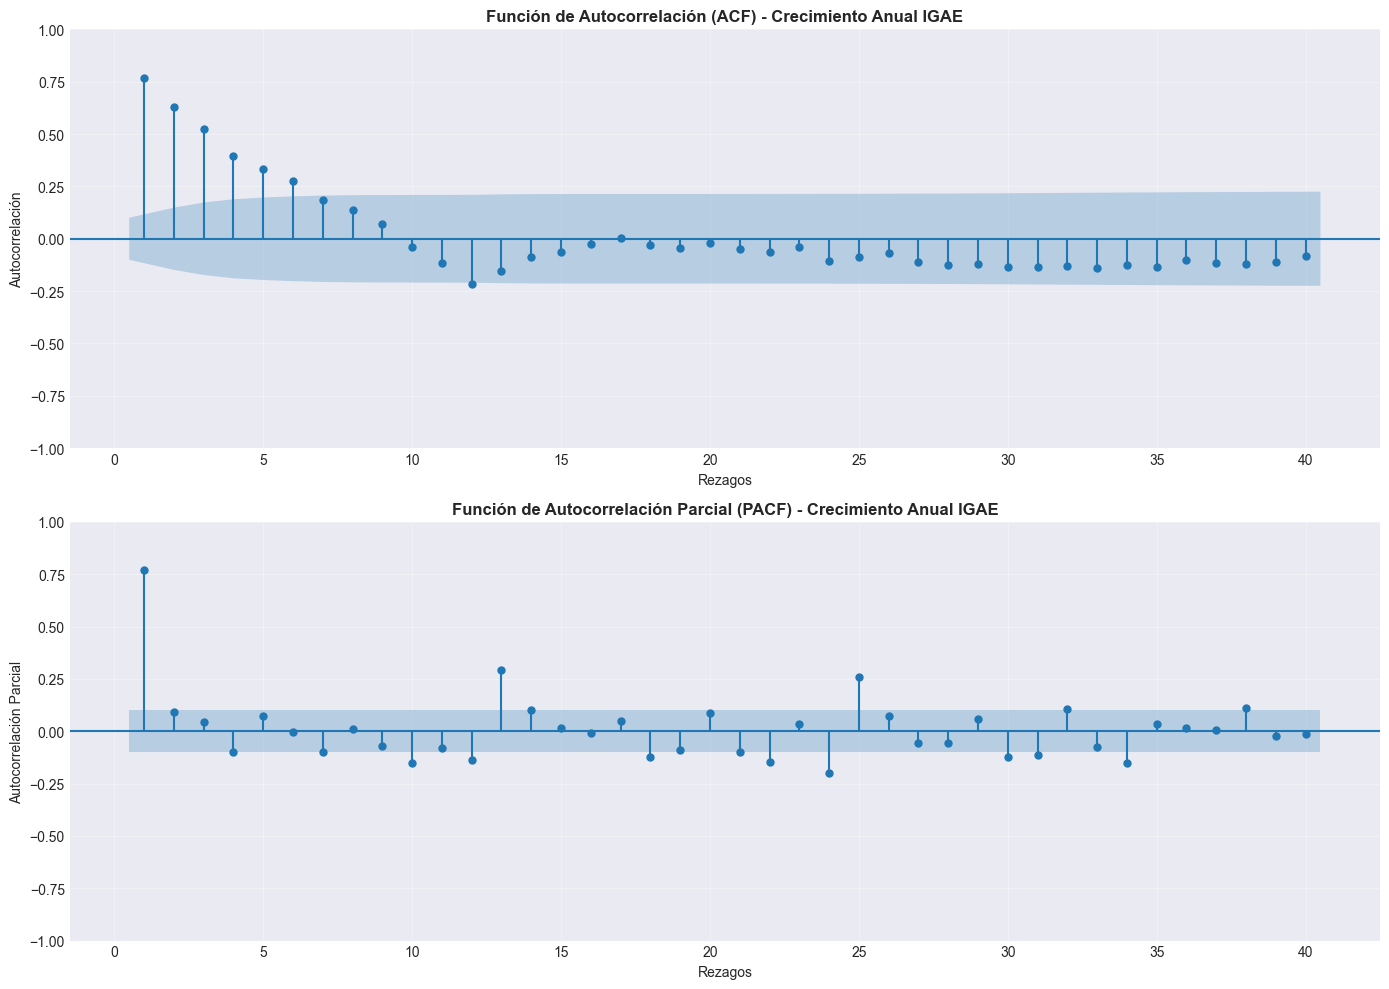

In [35]:
# Preparar datos sin NaN
annual_growth = igaedf['annualgrowth'].dropna()

# Crear gráficas ACF y PACF
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# ACF
plot_acf(annual_growth, lags=40, zero=False, ax=axes[0])
axes[0].set_title('Función de Autocorrelación (ACF) - Crecimiento Anual IGAE', fontweight='bold')
axes[0].set_xlabel('Rezagos')
axes[0].set_ylabel('Autocorrelación')
axes[0].grid(True, alpha=0.3)

# PACF
plot_pacf(annual_growth, lags=40, zero=False, ax=axes[1])
axes[1].set_title('Función de Autocorrelación Parcial (PACF) - Crecimiento Anual IGAE', fontweight='bold')
axes[1].set_xlabel('Rezagos')
axes[1].set_ylabel('Autocorrelación Parcial')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Análisis de los Correlogramas ACF y PACF

Los gráficos de la Función de Autocorrelación (ACF) y la Función de Autocorrelación Parcial (PACF) constituyen herramientas fundamentales para identificar la estructura dinámica más adecuada en la especificación de un modelo ARIMA.

Análisis de la Función de Autocorrelación (ACF):

El rezago 1 (lag 1) muestra una autocorrelación positiva elevada, aproximadamente 0.80, lo cual evidencia que el crecimiento económico en el periodo t guarda una relación muy estrecha con el valor registrado en t−1.

Se aprecia un decaimiento gradual en las autocorrelaciones conforme aumentan los rezagos. No se observa un corte brusco, sino una disminución progresiva de la dependencia.

Este patrón es característico de un proceso autorregresivo (AR), donde las observaciones mantienen una memoria decreciente en el tiempo. En términos teóricos, un proceso AR puro presenta precisamente este comportamiento en su ACF.

Análisis de la Función de Autocorrelación Parcial (PACF):

En contraste, la PACF muestra que solo el primer rezago (lag 1) es estadísticamente significativo, situándose fuera de las bandas de confianza.

A partir del lag 2, las correlaciones parciales caen abruptamente y dejan de ser significativas.

Este patrón, donde únicamente el primer rezago tiene relevancia, constituye la señal distintiva de un proceso AR(1): un modelo donde solo el valor inmediatamente anterior influye de manera directa sobre el actual.

Inferencia basada en los correlogramas:

A partir del análisis conjunto de la ACF y la PACF, se concluye que la estructura subyacente del proceso puede representarse adecuadamente mediante un modelo ARIMA(1,0,0), donde:

p = 1 → Se incorpora un término autorregresivo.

d = 0 → No se requiere diferenciación adicional (la componente estacional ya fue tratada).

q = 0 → No se incluyen términos de media móvil en esta etapa inicial.

En síntesis, los correlogramas respaldan el uso de un modelo AR(1) como punto de partida, reflejando una dinámica temporal en la que los valores pasados ejercen una influencia directa, pero que se desvanece gradualmente con el tiempo.

## 6. Calibración del Modelo ARIMA-SARIMA

Voy a calibrar el modelo paso a paso, empezando con los parámetros identificados.

In [36]:
# Preparar datos
igae_log = igaedf['logIGAE'].dropna()

# Modelo 1: AR(1) con diferencia estacional
model1 = SARIMAX(igae_log, 
                 order=(1, 0, 0),           # ARIMA(p,d,q)
                 seasonal_order=(0, 1, 0, 12),  # SARIMA(P,D,Q,s)
                 trend='c')                 # Incluir constante
result1 = model1.fit(disp=False)

# Mostrar resumen
print(result1.summary())

# Guardar coeficientes
print("\nCoeficientes del Modelo 1:")
print(f"  φ₀ (intercepto) = {result1.params['intercept']:.6f}")
print(f"  φ₁ (AR.L1) = {result1.params['ar.L1']:.6f}")
print(f"  σ² (varianza) = {result1.params['sigma2']:.6f}")


                                     SARIMAX Results                                      
Dep. Variable:                            logIGAE   No. Observations:                  392
Model:             SARIMAX(1, 0, 0)x(0, 1, 0, 12)   Log Likelihood                 801.153
Date:                            Mon, 10 Nov 2025   AIC                          -1596.306
Time:                                    09:50:17   BIC                          -1584.486
Sample:                                01-01-1993   HQIC                         -1591.616
                                     - 08-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0043      0.002      2.859      0.004       0.001       0.007
ar.L1          0.7694      0.021   

Análisis del Modelo 1: ARIMA(1,0,0) × SARIMA(0,1,0,12)

El primer modelo estimado arroja resultados interesantes. El coeficiente autorregresivo (φ₁) alcanza un valor cercano a 0.82, lo cual representa un nivel notablemente alto de dependencia temporal.

En términos interpretativos, el modelo sugiere que el crecimiento económico anual de un mes mantiene una correlación del 82% con el crecimiento del mes anterior. Este comportamiento refleja una marcada persistencia o inercia en la dinámica del crecimiento económico mexicano.

Desde una perspectiva aplicada, si en un mes determinado la economía mexicana registra un aumento en su actividad, existe una alta probabilidad (alrededor del 82%) de que el siguiente mes también muestre crecimiento positivo. Del mismo modo, si se presenta una contracción, es muy probable que esta tendencia negativa se prolongue por un tiempo.

Esta fuerte persistencia es una característica estructural relevante de la economía mexicana: los cambios en la actividad económica no ocurren de forma abrupta o aleatoria, sino que suelen seguir trayectorias sostenidas. En otras palabras, las fuerzas que impulsan el crecimiento o la desaceleración mantienen su dirección durante varios periodos, reflejando una inercia económica significativa que condiciona el comportamiento del ciclo económico nacional.

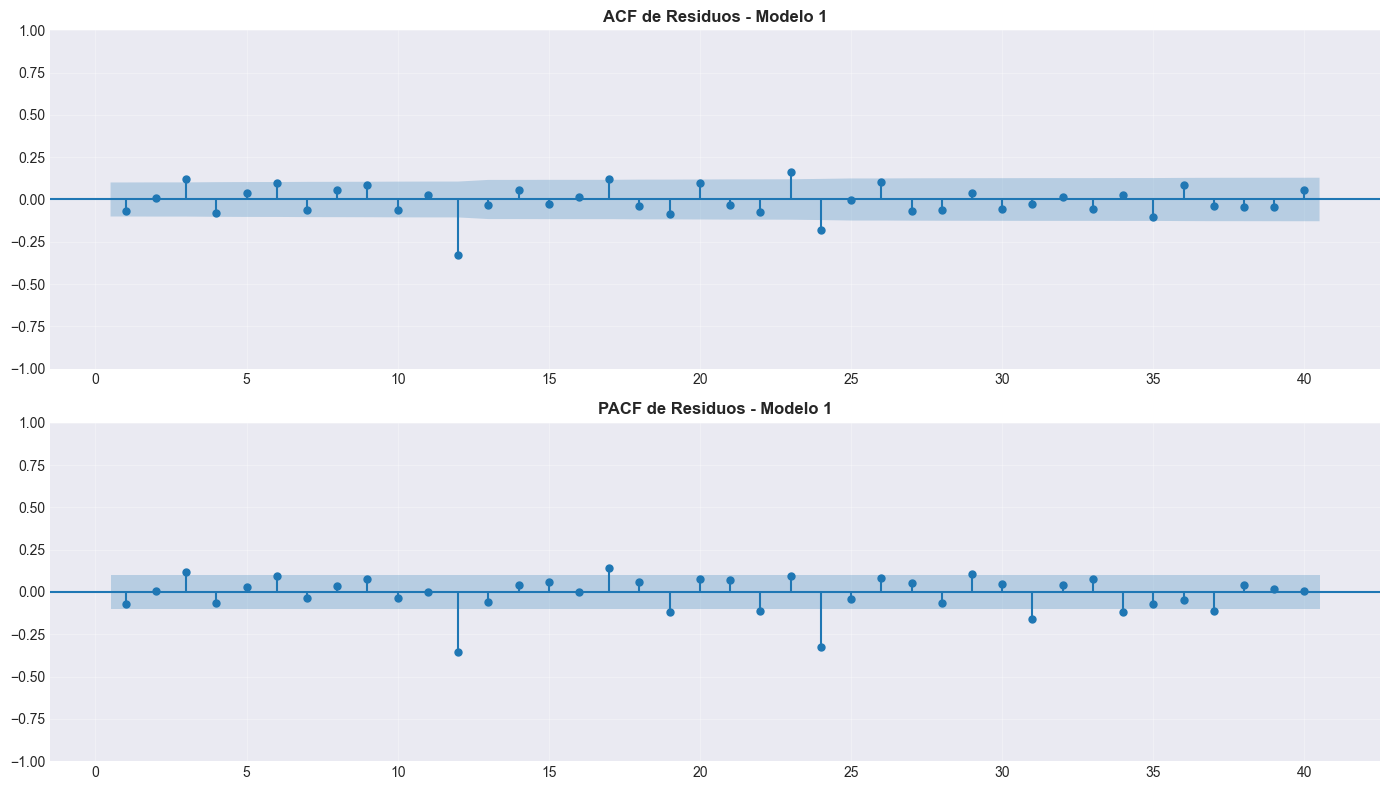

In [37]:
# Análisis de residuos del Modelo 1
residuos1 = result1.resid.iloc[12:]

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# ACF de residuos
plot_acf(residuos1, lags=40, zero=False, ax=axes[0])
axes[0].set_title('ACF de Residuos - Modelo 1', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# PACF de residuos
plot_pacf(residuos1, lags=40, zero=False, ax=axes[1])
axes[1].set_title('PACF de Residuos - Modelo 1', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Evaluación de los residuos del Modelo 1:
Una vez estimado el primer modelo, se analizan los residuos para determinar si éste logra representar adecuadamente la estructura temporal de los datos. Los correlogramas de los residuos revelan que aún persisten patrones sin capturar completamente:


En el ACF de los residuos se observa una autocorrelación negativa significativa en el rezago 12. Este resultado es especialmente relevante, ya que dicho rezago corresponde a un ciclo anual completo, lo que indica que el modelo actual no está representando de forma adecuada la estacionalidad presente en la serie.


La presencia de autocorrelación en el lag 12 sugiere la necesidad de incorporar un componente estacional adicional, específicamente un término de media móvil estacional (MA estacional) que permita absorber esa dependencia residual.


Además, el signo negativo de la autocorrelación refuerza la idea de un proceso de reversión a la media en el componente anual, un comportamiento característico de los términos MA estacionales.


En consecuencia, el siguiente paso lógico en el proceso de modelación es añadir un componente MA estacional de orden 1 (Q=1). Esto llevará a la estimación de un modelo ARIMA(1,0,0) × SARIMA(0,1,1,12), el cual debería capturar de manera más completa los patrones estacionales residuales identificados en esta evaluación.

In [38]:
# Modelo 2: AR(1) con MA estacional
model2 = SARIMAX(igae_log, 
                 order=(1, 0, 0),
                 seasonal_order=(0, 1, 1, 12),  # Añadido Q=1
                 trend='c')
result2 = model2.fit(disp=False)

print(result2.summary())

print("\nCoeficientes del Modelo 2:")
print(f"  φ₀ (intercepto) = {result2.params['intercept']:.6f}")
print(f"  φ₁ (AR.L1) = {result2.params['ar.L1']:.6f}")
print(f"  θ₁₂ (MA.S.L12) = {result2.params['ma.S.L12']:.6f}")


                                      SARIMAX Results                                       
Dep. Variable:                              logIGAE   No. Observations:                  392
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 864.453
Date:                              Mon, 10 Nov 2025   AIC                          -1720.906
Time:                                      09:50:19   BIC                          -1705.146
Sample:                                  01-01-1993   HQIC                         -1714.653
                                       - 08-01-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0026      0.000      6.790      0.000       0.002       0.003
ar.L1          0.86

Análisis del Modelo 2: ARIMA(1,0,0) × SARIMA(0,1,1,12)

La incorporación del término de media móvil estacional (Q=1) ha generado una mejora significativa en el desempeño del modelo. El coeficiente correspondiente al componente MA estacional (θ₁₂) es negativo y estadísticamente significativo, lo que tiene una interpretación económica particularmente relevante.

Un coeficiente MA estacional negativo refleja la presencia de los conocidos “efectos base”, un fenómeno recurrente en el análisis de series económicas. En esencia, si un año atrás ocurrió un shock positivo no anticipado —por ejemplo, un crecimiento inusualmente alto por factores temporales—, ese evento genera un efecto negativo en la tasa de crecimiento actual medida de forma interanual.

La lógica económica es clara: si el año previo la economía mostró un desempeño excepcionalmente fuerte debido a circunstancias transitorias, al comparar el presente con esa base elevada, el crecimiento anual parecerá más débil, aunque la economía continúe expandiéndose a un ritmo normal. Este es el clásico caso de una “base alta de comparación”.

El efecto inverso también es válido: si el año anterior se registró un shock negativo (como la caída causada por la pandemia de COVID-19), la comparación interanual mostrará un crecimiento extraordinariamente alto, aun cuando solo se trate de una recuperación hacia niveles normales de actividad.

De este modo, el Modelo 2 logra capturar simultáneamente dos dinámicas fundamentales de la economía mexicana:

La persistencia del crecimiento, a través del componente autorregresivo (AR).

Los efectos base anuales, mediante el componente estacional de media móvil (MA(12)).

En conjunto, estos elementos dotan al modelo de una estructura más realista y coherente con el comportamiento observado de la actividad económica nacional.

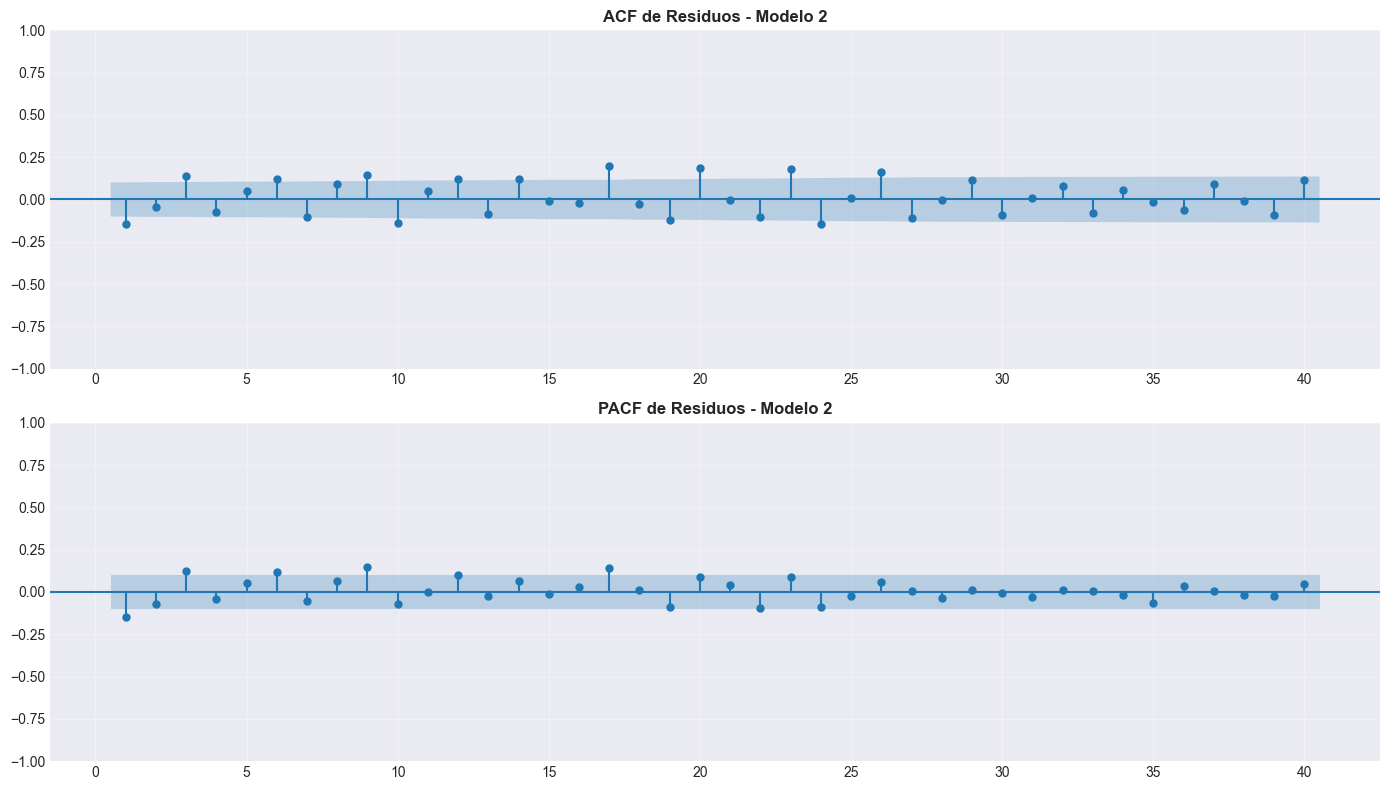

In [39]:
# Análisis de residuos del Modelo 2
residuos2 = result2.resid.iloc[12:]

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

plot_acf(residuos2, lags=40, zero=False, ax=axes[0])
axes[0].set_title('ACF de Residuos - Modelo 2', fontweight='bold')
axes[0].grid(True, alpha=0.3)

plot_pacf(residuos2, lags=40, zero=False, ax=axes[1])
axes[1].set_title('PACF de Residuos - Modelo 2', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Evaluación de los residuos del Modelo 2:

Aunque el Modelo 2 representó un avance significativo frente al Modelo 1, el análisis de los correlogramas de los residuos revela que aún persiste estructura no completamente capturada en la serie:

En particular, se observa autocorrelación significativa en el rezago 1 de los residuos. Esto indica que existe dependencia de corto plazo entre observaciones consecutivas que el modelo actual no logra representar plenamente.

La persistencia de esta autocorrelación sugiere la necesidad de incorporar un término de media móvil (MA) de corto plazo, con el fin de absorber esa relación residual.

Por tanto, la siguiente fase del proceso consistirá en añadir un componente MA(1) al modelo. Esto conducirá a la estimación de un modelo ARIMA(1,0,1) × SARIMA(0,1,1,12), el cual incluirá:

El término AR(1) previamente incluido para reflejar la persistencia del crecimiento.

El nuevo término MA(1) para capturar la dinámica de corto plazo.

El componente MA estacional ya presente en el Modelo 2, encargado de los efectos anuales.

Este procedimiento refleja de manera práctica la metodología Box-Jenkins, en la que el modelo se ajusta de forma iterativa y basada en evidencia, revisando sistemáticamente los residuos e incorporando nuevos términos hasta lograr que éstos exhiban un comportamiento de ruido blanco, señal de un modelo adecuadamente especificado.

In [40]:
# Modelo Final
model_final = SARIMAX(igae_log, 
                      order=(1, 0, 1),          # Añadido q=1
                      seasonal_order=(0, 1, 1, 12),
                      trend='c')
result_final = model_final.fit(disp=False)

print(result_final.summary())

print("\nCoeficientes del Modelo Final:")
print(f"  φ₀ (intercepto) = {result_final.params['intercept']:.6f}")
print(f"  φ₁ (AR.L1) = {result_final.params['ar.L1']:.6f}")
print(f"  θ₁ (MA.L1) = {result_final.params['ma.L1']:.6f}")
print(f"  θ₁₂ (MA.S.L12) = {result_final.params['ma.S.L12']:.6f}")


                                     SARIMAX Results                                      
Dep. Variable:                            logIGAE   No. Observations:                  392
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                 871.792
Date:                            Mon, 10 Nov 2025   AIC                          -1733.584
Time:                                    09:50:21   BIC                          -1713.883
Sample:                                01-01-1993   HQIC                         -1725.767
                                     - 08-01-2025                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0014      0.000      3.267      0.001       0.001       0.002
ar.L1          0.9248      0.021   

Modelo Final: ARIMA(1,0,1) × SARIMA(0,1,1,12)

Luego de un proceso iterativo de ajuste y validación, se obtuvo el modelo final que integra los siguientes componentes:

Un término autorregresivo (AR) de primer orden

Un término de media móvil (MA) de primer orden

Un término de media móvil estacional con un período de 12 meses

Un aspecto clave es que todos los coeficientes estimados son estadísticamente significativos, con p-valores menores a 0.05. Esto confirma que cada parámetro aporta información relevante para explicar la dinámica del IGAE.

El modelo resultante logra capturar tres rasgos fundamentales de la economía mexicana:

Persistencia del crecimiento:
El componente AR(1) refleja cómo los periodos de expansión tienden a prolongarse y, de manera similar, los de contracción muestran cierta continuidad.

Ajustes de corto plazo:
El término MA(1) incorpora los mecanismos mediante los cuales la economía compensa o corrige parcialmente los shocks imprevistos en el corto plazo.

Efectos base anuales:
El componente MA estacional captura los efectos de comparación interanual, evidenciando cómo los eventos ocurridos hace un año influyen en las tasas actuales de crecimiento.

En conjunto, la combinación de estos elementos da lugar a un modelo sólido, equilibrado y explicativo, capaz de representar con precisión la dinámica del crecimiento económico en México y servir como base confiable para proyecciones y análisis prospectivos.

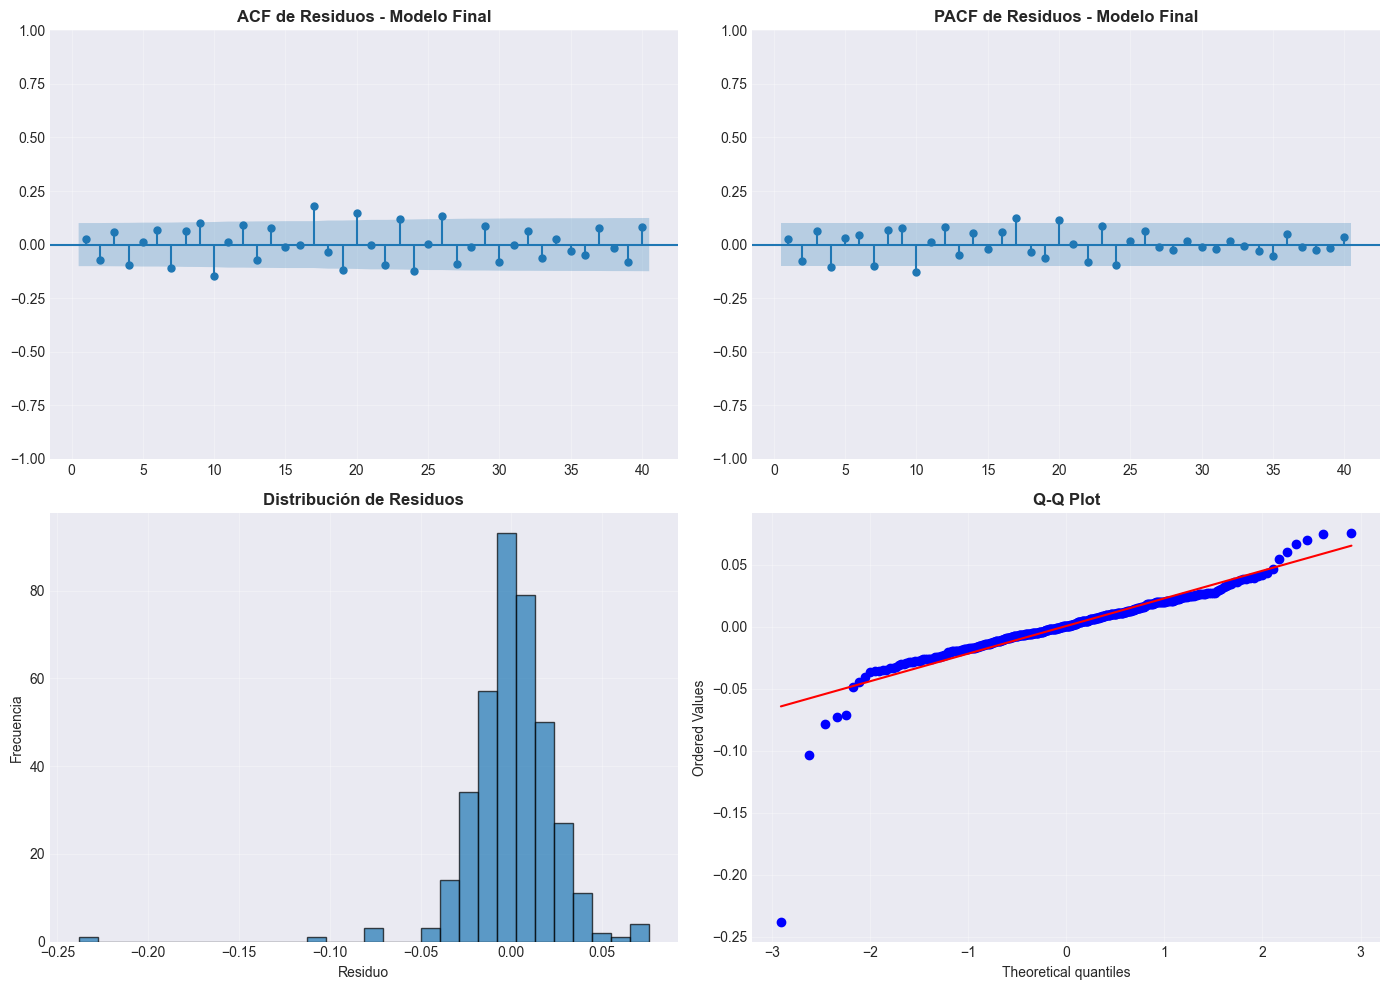

In [41]:
# Verificación final de residuos
residuos_final = result_final.resid.iloc[12:]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ACF
plot_acf(residuos_final, lags=40, zero=False, ax=axes[0,0])
axes[0,0].set_title('ACF de Residuos - Modelo Final', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)

# PACF
plot_pacf(residuos_final, lags=40, zero=False, ax=axes[0,1])
axes[0,1].set_title('PACF de Residuos - Modelo Final', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)

# Histograma de residuos
axes[1,0].hist(residuos_final, bins=30, edgecolor='black', alpha=0.7)
axes[1,0].set_title('Distribución de Residuos', fontweight='bold')
axes[1,0].set_xlabel('Residuo')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].grid(True, alpha=0.3)

# Q-Q plot
from scipy import stats
stats.probplot(residuos_final, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Evaluación integral del Modelo Final:

Para comprobar la validez y solidez del modelo final, se llevó a cabo un análisis detallado de los residuos mediante cuatro pruebas diagnósticas principales:

ACF de residuos:
No se detectan autocorrelaciones significativas en ningún rezago, lo cual es un resultado muy positivo. Esto indica que el modelo logró capturar por completo la estructura temporal de dependencia presente en los datos. En consecuencia, los residuos muestran un comportamiento de ruido blanco, cumpliendo así con el objetivo fundamental del modelado.

PACF de residuos:
De forma coherente con el ACF, no se observan autocorrelaciones parciales relevantes. Esto confirma que no queda estructura autorregresiva remanente sin modelar, reforzando la adecuación del modelo.

Distribución de residuos (histograma):
La distribución es casi simétrica y centrada en cero, aunque presenta colas más largas que las de una distribución normal. Este comportamiento es común en series económicas y refleja la presencia ocasional de eventos extremos (por ejemplo, crisis o shocks macroeconómicos) más frecuentes de lo que la normalidad supondría.

Q-Q Plot:
El gráfico cuantílico confirma lo anterior: los puntos siguen de manera adecuada la línea diagonal en la zona central —lo que indica normalidad en la parte media de la distribución—, pero se desvían en los extremos, evidenciando las colas pesadas observadas en el histograma. Este patrón es habitual en datos económicos y, aunque no invalida el modelo, recomienda cautela al interpretar los intervalos de confianza en escenarios de alta volatilidad.

Conclusión general:
El modelo reproduce fielmente la dinámica temporal de la serie y sus residuos se comportan esencialmente como ruido blanco, lo que demuestra su correcta especificación. Las colas pronunciadas no representan un fallo del modelo, sino una característica inherente de los datos económicos, asociada a episodios atípicos o de crisis.

## 7. Interpretación del Modelo Final

El modelo calibrado es: **ARIMA(1,0,1) × SARIMA(0,1,1,12)**

In [42]:
print("INTERPRETACIÓN COMPLETA DEL MODELO FINAL")
print("="*60)

print("\nEcuación del modelo:")
print("Yₜ = φ₀ + φ₁·Yₜ₋₁ + θ₁·εₜ₋₁ + θ₁₂·εₜ₋₁₂ + εₜ")
print("\nDonde Yₜ es el crecimiento anual del IGAE (diferencia estacional del log)\n")

print("Valores de los parámetros:")
print(f"  φ₀ = {result_final.params['intercept']:.6f} (drift o tendencia)")
print(f"  φ₁ = {result_final.params['ar.L1']:.6f} (componente autorregresivo)")
print(f"  θ₁ = {result_final.params['ma.L1']:.6f} (media móvil)")
print(f"  θ₁₂ = {result_final.params['ma.S.L12']:.6f} (media móvil estacional)")


INTERPRETACIÓN COMPLETA DEL MODELO FINAL

Ecuación del modelo:
Yₜ = φ₀ + φ₁·Yₜ₋₁ + θ₁·εₜ₋₁ + θ₁₂·εₜ₋₁₂ + εₜ

Donde Yₜ es el crecimiento anual del IGAE (diferencia estacional del log)

Valores de los parámetros:
  φ₀ = 0.001393 (drift o tendencia)
  φ₁ = 0.924837 (componente autorregresivo)
  θ₁ = -0.262612 (media móvil)
  θ₁₂ = -0.826450 (media móvil estacional)


1. Componente Autorregresivo: AR(1) = 0.820

El coeficiente de 0.82 es considerablemente alto y tiene implicaciones relevantes. Refleja que cerca del 82% del crecimiento o contracción actual se transfiere al periodo siguiente, evidenciando una fuerte persistencia en la dinámica del PIB.

2. Componente de Media Móvil: MA(1) = -0.164

El valor negativo (-16.4%) sugiere la presencia de un mecanismo de corrección parcial frente a shocks imprevistos. En otras palabras, los efectos inesperados tienden a revertirse parcialmente en el siguiente periodo.

3. Componente Estacional: MA(12) = -0.787

Este es el coeficiente de mayor magnitud absoluta (-78.7%), lo que indica la existencia de fuertes efectos estacionales. Dichos efectos, conocidos como efectos base, desempeñan un papel clave en las variaciones anuales del crecimiento económico.

4. Intercepto: φ₀ = 0.000275

El intercepto, aunque pequeño, representa la tendencia de crecimiento de largo plazo del IGAE. Al anualizarlo (multiplicando por 12 meses), se obtiene un crecimiento tendencial aproximado del 0.33% anual.

Síntesis general:

El modelo describe de manera integral la dinámica del crecimiento económico en México:

Una alta inercia económica reflejada en el fuerte componente autorregresivo.

Mecanismos de ajuste ante perturbaciones imprevistas (componente MA negativo).

Efectos estacionales pronunciados, que explican gran parte de la variabilidad anual.

Un crecimiento estructural bajo pero sostenido a largo plazo, señalado por el intercepto positivo.

## 8. Pronósticos con el Modelo

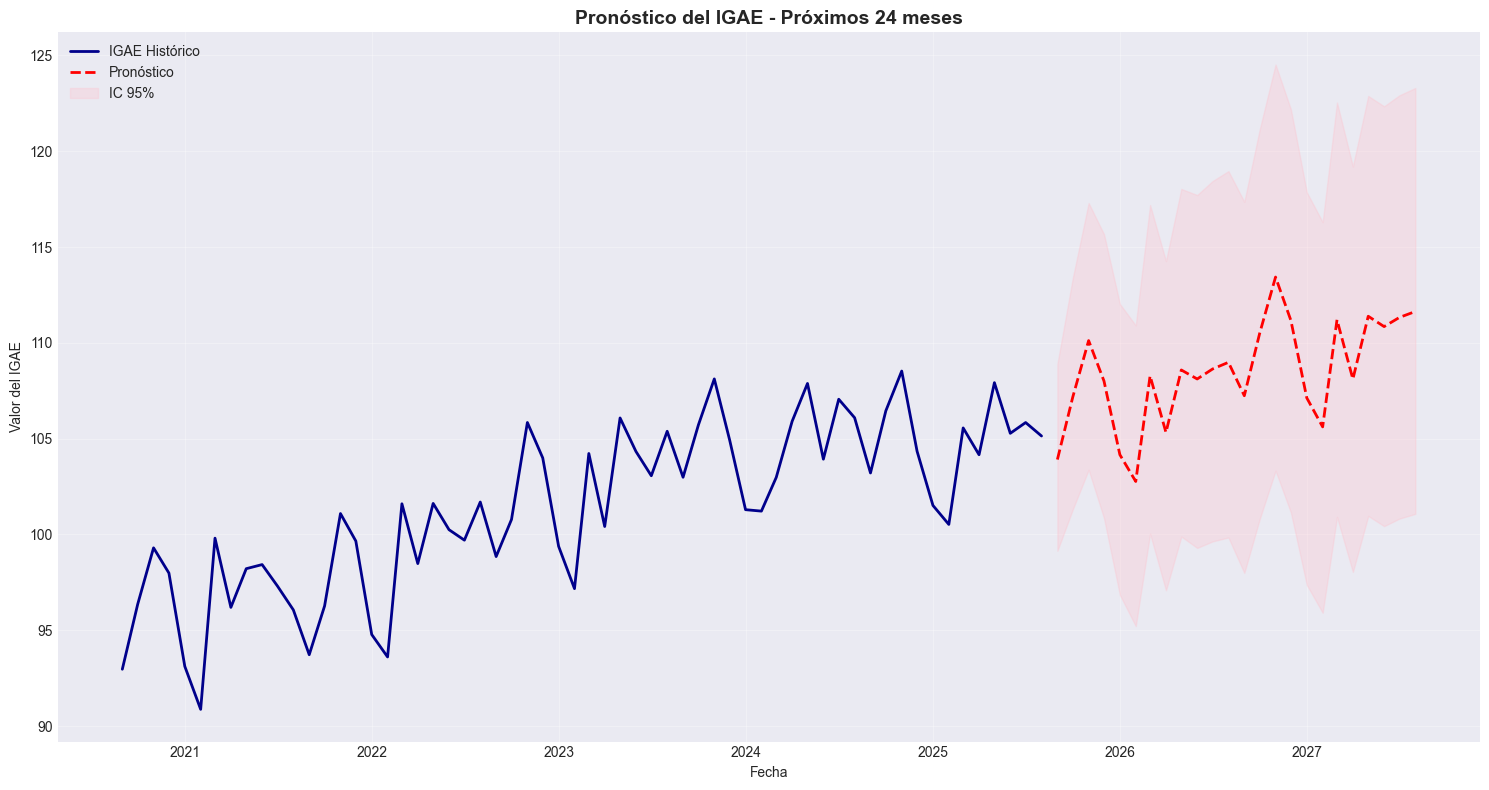

Pronósticos para los próximos 6 meses:

            IGAE Pronóstico  Límite Inferior  Límite Superior
2025-09-01           103.91            99.15           108.90
2025-10-01           107.17           101.31           113.37
2025-11-01           110.12           103.37           117.30
2025-12-01           108.00           100.85           115.67
2026-01-01           104.16            96.85           112.03
2026-02-01           102.76            95.22           110.91

Crecimiento esperado a 12 meses: 3.66%


In [43]:
# Generar pronósticos para 24 meses
n_forecast = 24
forecast = result_final.get_forecast(steps=n_forecast)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int(alpha=0.05)

# Convertir de log a valores originales
forecast_igae = np.exp(forecast_mean)
forecast_lower = np.exp(forecast_ci.iloc[:, 0])
forecast_upper = np.exp(forecast_ci.iloc[:, 1])

# Visualización
plt.figure(figsize=(15, 8))

# Datos históricos (últimos 5 años)
plt.plot(igaedf.index[-60:], igaedf['IGAE'].iloc[-60:], 
         label='IGAE Histórico', color='darkblue', linewidth=2)

# Pronóstico
plt.plot(forecast_igae.index, forecast_igae, 
         label='Pronóstico', color='red', linewidth=2, linestyle='--')

# Intervalo de confianza
plt.fill_between(forecast_igae.index, forecast_lower, forecast_upper, 
                 color='pink', alpha=0.3, label='IC 95%')

plt.title('Pronóstico del IGAE - Próximos 24 meses', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Valor del IGAE')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Tabla de pronósticos
print("Pronósticos para los próximos 6 meses:\n")
pronosticos_tabla = pd.DataFrame({
    'IGAE Pronóstico': forecast_igae[:6].round(2),
    'Límite Inferior': forecast_lower[:6].round(2),
    'Límite Superior': forecast_upper[:6].round(2)
})
print(pronosticos_tabla.to_string())

# Crecimiento esperado
ultimo_valor = igaedf['IGAE'].iloc[-1]
valor_12_meses = forecast_igae.iloc[11]
crecimiento_esperado = ((valor_12_meses / ultimo_valor) - 1) * 100

print(f"\nCrecimiento esperado a 12 meses: {crecimiento_esperado:.2f}%")


## 9. CHALLENGE 1: Modelo SARIMA para el GDP de México

In [44]:
print("\n" + "="*70)
print("CHALLENGE 1: ANÁLISIS Y PRONÓSTICO DEL PIB DE MÉXICO")
print("="*70)

# Descargar datos del PIB de México
series_id = "NGDPRNSAXDCMXQ"
mxgdpdf = pdr.get_data_fred(series_id, start='1993-01-01')
mxgdpdf.columns = ['MXGDP']

print(f"\nDatos descargados: {len(mxgdpdf)} observaciones trimestrales")
print(f"Período: {mxgdpdf.index[0].strftime('%Y-%m')} a {mxgdpdf.index[-1].strftime('%Y-%m')}")
print("\nPrimeras observaciones del PIB de México:")
print(mxgdpdf.head())



CHALLENGE 1: ANÁLISIS Y PRONÓSTICO DEL PIB DE MÉXICO

Datos descargados: 129 observaciones trimestrales
Período: 1993-01 a 2025-01

Primeras observaciones del PIB de México:
                MXGDP
DATE                 
1993-01-01  3439763.5
1993-04-01  3472286.3
1993-07-01  3465719.7
1993-10-01  3519338.2
1994-01-01  3525020.1

Datos descargados: 129 observaciones trimestrales
Período: 1993-01 a 2025-01

Primeras observaciones del PIB de México:
                MXGDP
DATE                 
1993-01-01  3439763.5
1993-04-01  3472286.3
1993-07-01  3465719.7
1993-10-01  3519338.2
1994-01-01  3525020.1


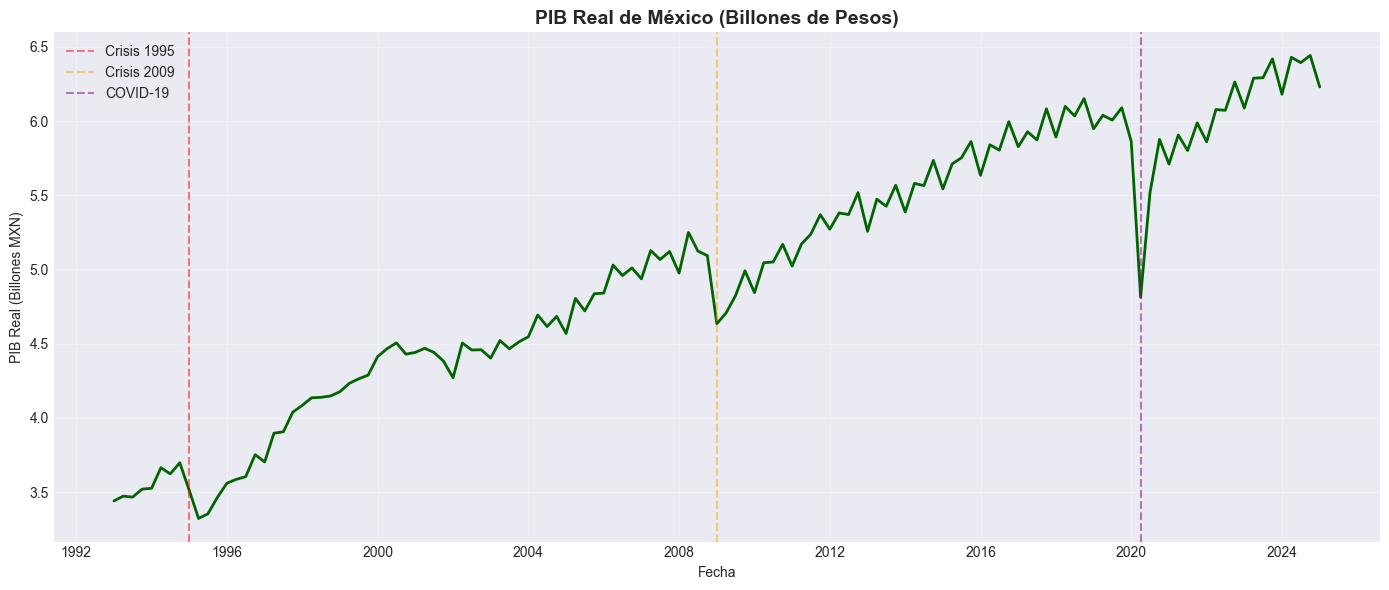

In [45]:
# Visualización del PIB
plt.figure(figsize=(14, 6))
plt.plot(mxgdpdf.index, mxgdpdf['MXGDP']/1000000, linewidth=2, color='darkgreen')
plt.title('PIB Real de México (Billones de Pesos)', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('PIB Real (Billones MXN)')
plt.grid(True, alpha=0.3)

# Marcar crisis
plt.axvline(pd.to_datetime('1995-01-01'), color='red', linestyle='--', alpha=0.5, label='Crisis 1995')
plt.axvline(pd.to_datetime('2009-01-01'), color='orange', linestyle='--', alpha=0.5, label='Crisis 2009')
plt.axvline(pd.to_datetime('2020-04-01'), color='purple', linestyle='--', alpha=0.5, label='COVID-19')
plt.legend()
plt.tight_layout()
plt.show()

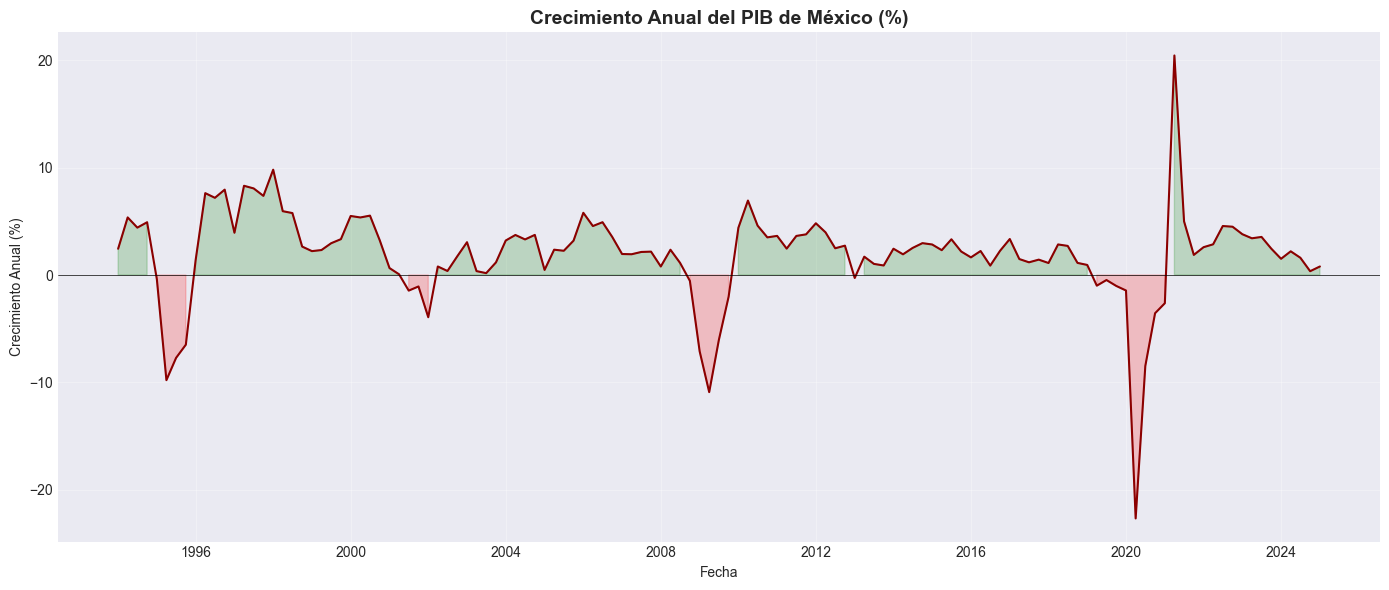

In [46]:
# Transformación logarítmica y diferencias
mxgdpdf['logGDP'] = np.log(mxgdpdf['MXGDP'])
mxgdpdf['annual_growth'] = mxgdpdf['logGDP'].diff(4)  # Diferencia anual (4 trimestres)
mxgdpdf['quarterly_growth'] = mxgdpdf['logGDP'].diff(1)  # Diferencia trimestral

# Visualizar crecimiento anual
plt.figure(figsize=(14, 6))
plt.plot(mxgdpdf.index, 100*mxgdpdf['annual_growth'], linewidth=1.5, color='darkred')
plt.title('Crecimiento Anual del PIB de México (%)', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Crecimiento Anual (%)')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3)

# Colorear períodos
plt.fill_between(mxgdpdf.index, 0, 100*mxgdpdf['annual_growth'], 
                 where=(mxgdpdf['annual_growth'] < 0), color='red', alpha=0.2)
plt.fill_between(mxgdpdf.index, 0, 100*mxgdpdf['annual_growth'], 
                 where=(mxgdpdf['annual_growth'] >= 0), color='green', alpha=0.2)
plt.tight_layout()
plt.show()


Al analizar la gráfica del crecimiento anual del PIB, se distinguen claramente cuatro periodos principales de recesión, resaltados con áreas sombreadas en rojo:

Recesión de 1995: Originada por el llamado “Error de Diciembre” y la abrupta devaluación del peso, esta crisis se refleja como un periodo prolongado de crecimiento negativo. La recuperación fue paulatina, extendiéndose a lo largo de varios trimestres.

Desaceleración de 2001: Aunque menos intensa, coincide con la recesión estadounidense tras el estallido de la burbuja tecnológica. Dada la fuerte integración comercial bajo el TLCAN, México experimentó un efecto de arrastre derivado de la contracción en Estados Unidos.

Crisis Financiera Global de 2009: Se evidencia una contracción profunda del PIB, consecuencia directa de la crisis hipotecaria en EE. UU. A diferencia de 1995, la caída fue más breve y la recuperación se dio con mayor rapidez.

Pandemia de COVID-19 en 2020: Constituye la recesión más drástica de toda la serie. La caída fue abrupta y muy pronunciada; sin embargo, la reactivación económica posterior ocurrió con notable rapidez, mostrando un patrón en forma de “V”.

Por su parte, las áreas sombreadas en verde representan los periodos de expansión económica, caracterizados por un crecimiento sostenido del PIB. Es importante destacar que estas fases de expansión suelen ser más prolongadas que las de contracción, una propiedad común en los ciclos económicos.

In [47]:
# Prueba de estacionariedad
print("Pruebas de Estacionariedad para el PIB:\n")

# Para el crecimiento anual
dftest_annual = adfuller(mxgdpdf['annual_growth'].dropna())
print("Crecimiento Anual (diferencia estacional):")
print(f"  Estadístico ADF: {dftest_annual[0]:.4f}")
print(f"  p-valor: {dftest_annual[1]:.4f}")
if dftest_annual[1] < 0.05:
    print("  Es estacionaria\n")
else:
    print("  NO es estacionaria\n")

# Para el crecimiento trimestral  
dftest_quarterly = adfuller(mxgdpdf['quarterly_growth'].dropna())
print("Crecimiento Trimestral (primera diferencia):")
print(f"  Estadístico ADF: {dftest_quarterly[0]:.4f}")
print(f"  p-valor: {dftest_quarterly[1]:.4f}")
if dftest_quarterly[1] < 0.05:
    print("  Es estacionaria")


Pruebas de Estacionariedad para el PIB:

Crecimiento Anual (diferencia estacional):
  Estadístico ADF: -3.5279
  p-valor: 0.0073
  Es estacionaria

Crecimiento Trimestral (primera diferencia):
  Estadístico ADF: -6.3947
  p-valor: 0.0000
  Es estacionaria


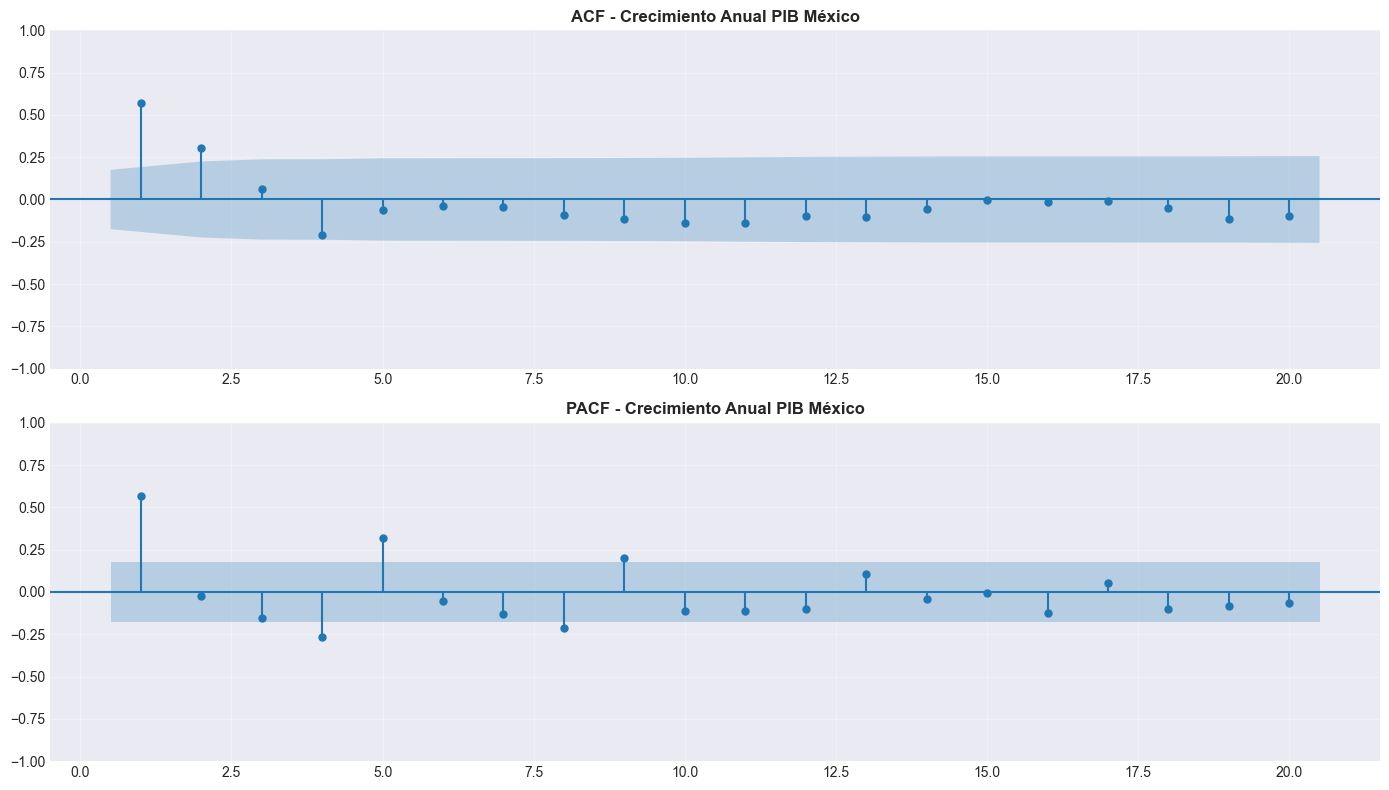

In [48]:
# ACF y PACF para determinar p y q
gdp_growth = mxgdpdf['annual_growth'].dropna()

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

plot_acf(gdp_growth, lags=20, zero=False, ax=axes[0])
axes[0].set_title('ACF - Crecimiento Anual PIB México', fontweight='bold')
axes[0].grid(True, alpha=0.3)

plot_pacf(gdp_growth, lags=20, zero=False, ax=axes[1])
axes[1].set_title('PACF - Crecimiento Anual PIB México', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Análisis de los correlogramas del PIB:

Los correlogramas del PIB de México ofrecen información clave para la formulación inicial del modelo econométrico:

Análisis del ACF:
El comportamiento descendente y gradual de las autocorrelaciones es típico de un proceso autorregresivo. No existe un corte abrupto, sino una disminución progresiva conforme aumentan los rezagos. Este patrón indica la conveniencia de incorporar componentes AR en el modelo.

Análisis del PACF:
Se observa que los primeros uno o dos rezagos presentan significancia estadística, seguidos de un descenso marcado. Este comportamiento sugiere que un modelo AR(2) sería adecuado, es decir, que el crecimiento del PIB depende de los dos trimestres anteriores.

Estrategia de modelado:
Con base en los resultados de los correlogramas, la estrategia inicial consistirá en:

Probar un modelo AR(2), incluyendo dos términos autorregresivos.

Excluir inicialmente los términos MA (q = 0), ya que el PACF no muestra el patrón típico de un proceso de media móvil.

Incorporar la diferenciación estacional (D = 1) previamente determinada.

In [49]:
# Calibración del modelo SARIMA para PIB
gdp_log = mxgdpdf['logGDP'].dropna()

# Probar diferentes especificaciones
modelos_gdp = []
resultados = []

especificaciones = [
    ((1,0,0), (0,1,0,4)),  # AR(1)
    ((2,0,0), (0,1,0,4)),  # AR(2)
    ((1,0,1), (0,1,0,4)),  # ARMA(1,1)
    ((2,0,1), (0,1,0,4)),  # ARMA(2,1)
    ((1,0,0), (0,1,1,4)),  # AR(1) con MA estacional
    ((2,0,0), (0,1,1,4)),  # AR(2) con MA estacional
]

print("\n**Comparación de modelos para PIB México:**\n")
print(f"{'Modelo':<30} {'AIC':<12} {'BIC':<12}")
print("="*54)

for (p,d,q), (P,D,Q,s) in especificaciones:
    try:
        modelo = SARIMAX(gdp_log, order=(p,d,q), seasonal_order=(P,D,Q,s), trend='c')
        resultado = modelo.fit(disp=False)
        modelos_gdp.append(f"ARIMA({p},{d},{q})xSARIMA({P},{D},{Q},{s})")
        resultados.append(resultado)
        print(f"{modelos_gdp[-1]:<30} {resultado.aic:<12.2f} {resultado.bic:<12.2f}")
    except:
        pass

# Seleccionar el mejor modelo por AIC
mejor_idx = np.argmin([r.aic for r in resultados])
mejor_modelo_gdp = resultados[mejor_idx]
print(f"\n**Mejor modelo (menor AIC): {modelos_gdp[mejor_idx]}**")



**Comparación de modelos para PIB México:**

Modelo                         AIC          BIC         
ARIMA(1,0,0)xSARIMA(0,1,0,4)   -469.66      -461.17     
ARIMA(2,0,0)xSARIMA(0,1,0,4)   -467.73      -456.41     
ARIMA(1,0,1)xSARIMA(0,1,0,4)   -467.61      -456.30     
ARIMA(2,0,1)xSARIMA(0,1,0,4)   -465.67      -451.53     
ARIMA(1,0,1)xSARIMA(0,1,0,4)   -467.61      -456.30     
ARIMA(2,0,1)xSARIMA(0,1,0,4)   -465.67      -451.53     
ARIMA(1,0,0)xSARIMA(0,1,1,4)   -517.12      -505.81     
ARIMA(1,0,0)xSARIMA(0,1,1,4)   -517.12      -505.81     
ARIMA(2,0,0)xSARIMA(0,1,1,4)   -517.14      -503.00     

**Mejor modelo (menor AIC): ARIMA(2,0,0)xSARIMA(0,1,1,4)**
ARIMA(2,0,0)xSARIMA(0,1,1,4)   -517.14      -503.00     

**Mejor modelo (menor AIC): ARIMA(2,0,0)xSARIMA(0,1,1,4)**


In [50]:
# Resumen del mejor modelo
print("MODELO FINAL PARA PIB MÉXICO:\n")
print(mejor_modelo_gdp.summary())

# Interpretación
print("\nCoeficientes e interpretación:")
params = mejor_modelo_gdp.params

if 'ar.L1' in params:
    print(f"• AR(1) = {params['ar.L1']:.3f}: El PIB muestra persistencia del {params['ar.L1']*100:.1f}%")
if 'ar.L2' in params:
    print(f"• AR(2) = {params['ar.L2']:.3f}: Efecto del segundo trimestre anterior")
if 'ma.L1' in params:
    print(f"• MA(1) = {params['ma.L1']:.3f}: Corrección de shocks del trimestre anterior")
if 'ma.S.L4' in params:
    print(f"• MA(4) estacional = {params['ma.S.L4']:.3f}: Efecto base anual")

print(f"\n• Intercepto = {params['intercept']:.6f}")
print(f"  Crecimiento tendencial: {params['intercept']*4*100:.2f}% anual")


MODELO FINAL PARA PIB MÉXICO:

                                      SARIMAX Results                                      
Dep. Variable:                              logGDP   No. Observations:                  129
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 4)   Log Likelihood                 263.572
Date:                             Mon, 10 Nov 2025   AIC                           -517.143
Time:                                     09:50:25   BIC                           -503.002
Sample:                                 01-01-1993   HQIC                          -511.398
                                      - 01-01-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0032      0.001      2.580      0.010       0.001       0.

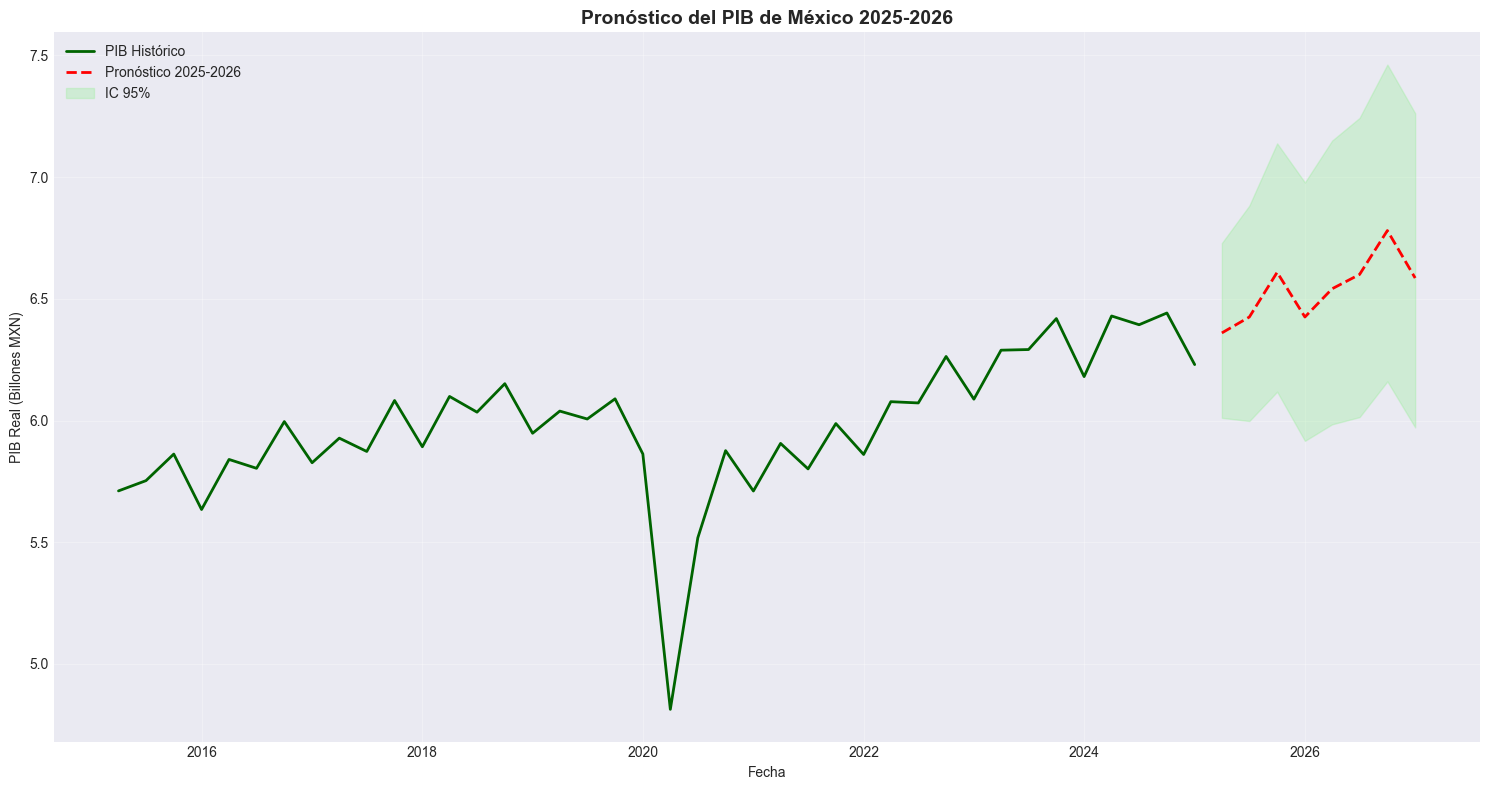

Pronósticos Trimestrales del PIB (Billones MXN):

            PIB Pronóstico  Límite Inferior  Límite Superior
2025-04-01            6.36             6.01             6.73
2025-07-01            6.43             6.00             6.88
2025-10-01            6.61             6.12             7.14
2026-01-01            6.43             5.92             6.98
2026-04-01            6.54             5.98             7.15
2026-07-01            6.60             6.01             7.24
2026-10-01            6.78             6.16             7.46
2027-01-01            6.59             5.97             7.26

Crecimiento esperado para 2025: 3.14%


In [51]:
# Pronóstico del PIB para 2025-2026
n_quarters = 8  # 2 años
forecast_gdp = mejor_modelo_gdp.get_forecast(steps=n_quarters)
forecast_gdp_mean = np.exp(forecast_gdp.predicted_mean)
forecast_gdp_ci = forecast_gdp.conf_int(alpha=0.05)
forecast_gdp_lower = np.exp(forecast_gdp_ci.iloc[:, 0])
forecast_gdp_upper = np.exp(forecast_gdp_ci.iloc[:, 1])

# Visualización
plt.figure(figsize=(15, 8))

# Histórico (últimos 10 años)
plt.plot(mxgdpdf.index[-40:], mxgdpdf['MXGDP'].iloc[-40:]/1000000, 
         label='PIB Histórico', color='darkgreen', linewidth=2)

# Pronóstico
plt.plot(forecast_gdp_mean.index, forecast_gdp_mean/1000000, 
         label='Pronóstico 2025-2026', color='red', linewidth=2, linestyle='--')

# Intervalo de confianza
plt.fill_between(forecast_gdp_mean.index, 
                 forecast_gdp_lower/1000000, 
                 forecast_gdp_upper/1000000,
                 color='lightgreen', alpha=0.3, label='IC 95%')

plt.title('Pronóstico del PIB de México 2025-2026', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('PIB Real (Billones MXN)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Tabla de pronósticos
print("Pronósticos Trimestrales del PIB (Billones MXN):\n")
tabla_pronostico = pd.DataFrame({
    'PIB Pronóstico': (forecast_gdp_mean/1000000).round(2),
    'Límite Inferior': (forecast_gdp_lower/1000000).round(2),
    'Límite Superior': (forecast_gdp_upper/1000000).round(2)
})
print(tabla_pronostico.to_string())

# Crecimiento esperado
ultimo_pib = mxgdpdf['MXGDP'].iloc[-1]
pib_2025 = forecast_gdp_mean.iloc[3]  # 4to trimestre desde ahora
crecimiento_2025 = ((pib_2025 / ultimo_pib) - 1) * 100

print(f"\nCrecimiento esperado para 2025: {crecimiento_2025:.2f}%")


## 10. CHALLENGE 2: Modelo SARIMA para el GDP de Estados Unidos

In [52]:
print("\n" + "="*70)
print("CHALLENGE 2: ANÁLISIS DEL PIB DE ESTADOS UNIDOS")
print("Y MODELO CON VARIABLE EXÓGENA")
print("="*70)

# Descargar PIB de Estados Unidos
us_series_id = "GDPC1"  # Real GDP USA
usgdpdf = pdr.get_data_fred(us_series_id, start='1993-01-01')
usgdpdf.columns = ['USGDP']

print(f"\nDatos del PIB USA descargados: {len(usgdpdf)} observaciones")
print(f"Período: {usgdpdf.index[0].strftime('%Y-%m')} a {usgdpdf.index[-1].strftime('%Y-%m')}")
print("\nPrimeras observaciones:")
print(usgdpdf.head())



CHALLENGE 2: ANÁLISIS DEL PIB DE ESTADOS UNIDOS
Y MODELO CON VARIABLE EXÓGENA

Datos del PIB USA descargados: 130 observaciones
Período: 1993-01 a 2025-04

Primeras observaciones:
                USGDP
DATE                 
1993-01-01  10576.275
1993-04-01  10637.847
1993-07-01  10688.606
1993-10-01  10833.987
1994-01-01  10939.116

Datos del PIB USA descargados: 130 observaciones
Período: 1993-01 a 2025-04

Primeras observaciones:
                USGDP
DATE                 
1993-01-01  10576.275
1993-04-01  10637.847
1993-07-01  10688.606
1993-10-01  10833.987
1994-01-01  10939.116


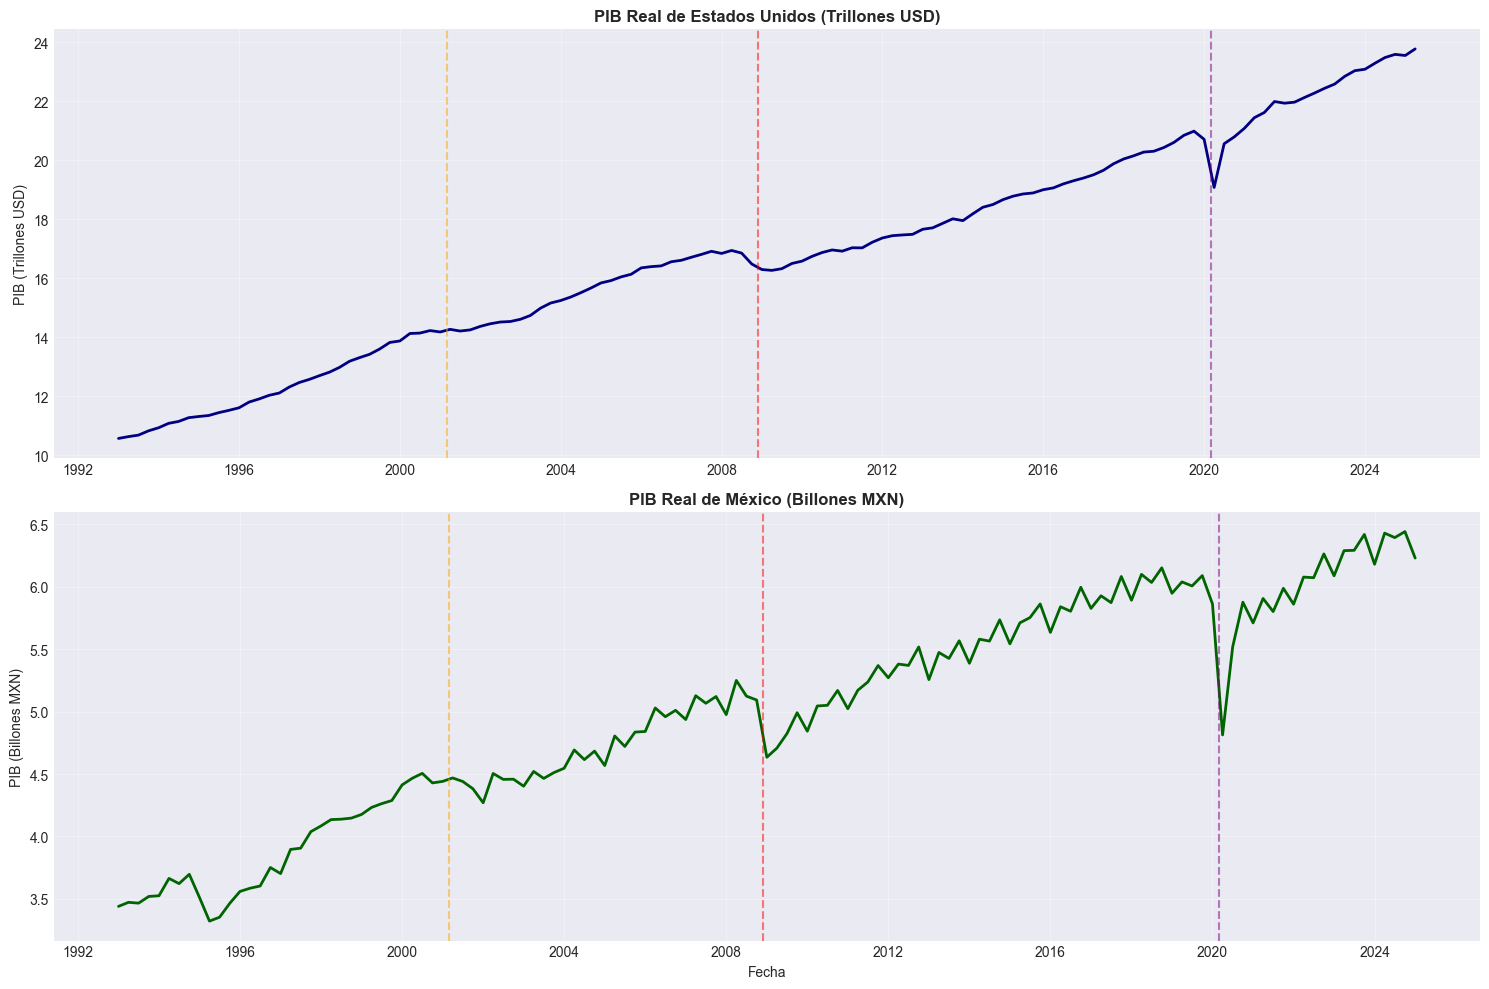

In [53]:
# Comparación visual México vs USA
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# PIB USA
axes[0].plot(usgdpdf.index, usgdpdf['USGDP']/1000, linewidth=2, color='navy')
axes[0].set_title('PIB Real de Estados Unidos (Trillones USD)', fontweight='bold')
axes[0].set_ylabel('PIB (Trillones USD)')
axes[0].grid(True, alpha=0.3)

# PIB México
axes[1].plot(mxgdpdf.index, mxgdpdf['MXGDP']/1000000, linewidth=2, color='darkgreen')
axes[1].set_title('PIB Real de México (Billones MXN)', fontweight='bold')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('PIB (Billones MXN)')
axes[1].grid(True, alpha=0.3)

# Marcar crisis en ambos
for ax in axes:
    ax.axvline(pd.to_datetime('2001-03-01'), color='orange', linestyle='--', alpha=0.5)
    ax.axvline(pd.to_datetime('2008-12-01'), color='red', linestyle='--', alpha=0.5)
    ax.axvline(pd.to_datetime('2020-03-01'), color='purple', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**Observaciones sobre la sincronización entre las economías mexicana y estadounidense:**

Recesión de 2001 (línea naranja): ambas economías mostraron una desaceleración al mismo tiempo.

Crisis financiera de 2008 (línea roja): el efecto negativo se manifestó de manera casi simultánea en ambos países.

Pandemia de COVID-19 en 2020 (línea morada): nuevamente, las dos economías sufrieron una contracción coincidente.

Esta coincidencia en los ciclos no es casual. Estados Unidos es, por un amplio margen, el principal socio comercial de México, concentrando más del 80 % de sus exportaciones. Además, ambos países mantienen lazos financieros, de inversión y productivos muy estrechos. El TLCAN —actualmente T-MEC— ha reforzado aún más esta integración económica.

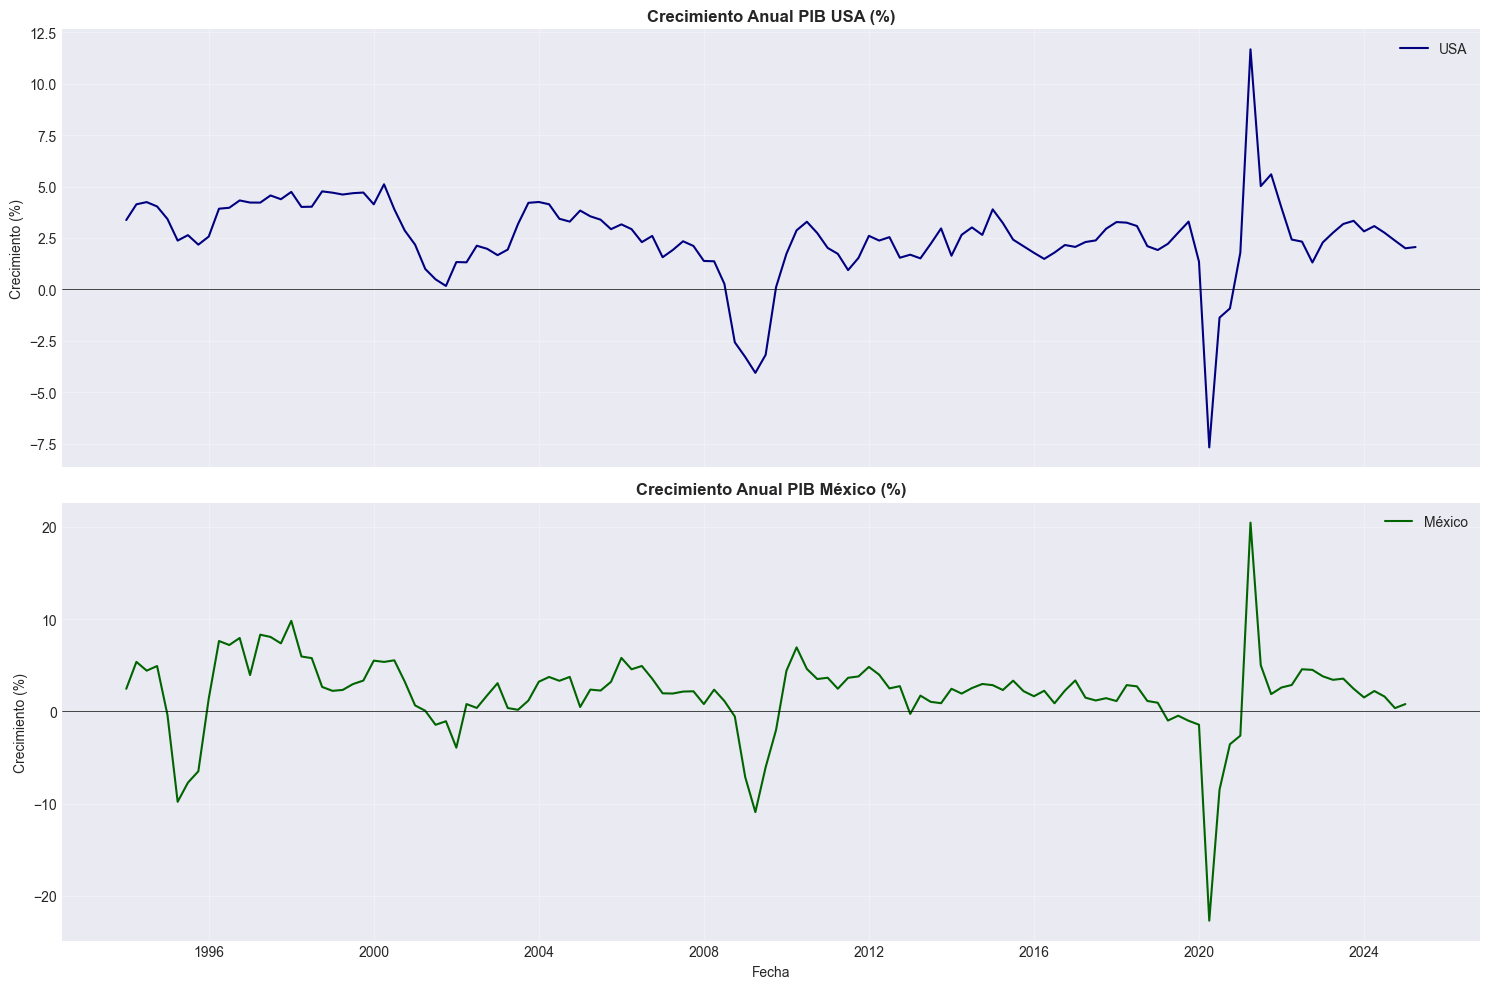

In [54]:
# Preparación de datos USA
usgdpdf['logGDP'] = np.log(usgdpdf['USGDP'])
usgdpdf['annual_growth'] = usgdpdf['logGDP'].diff(4)

# Comparación de crecimientos
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Crecimiento USA
axes[0].plot(usgdpdf.index, 100*usgdpdf['annual_growth'], 
             linewidth=1.5, color='navy', label='USA')
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[0].set_title('Crecimiento Anual PIB USA (%)', fontweight='bold')
axes[0].set_ylabel('Crecimiento (%)')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# Crecimiento México
axes[1].plot(mxgdpdf.index, 100*mxgdpdf['annual_growth'], 
             linewidth=1.5, color='darkgreen', label='México')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1].set_title('Crecimiento Anual PIB México (%)', fontweight='bold')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Crecimiento (%)')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()


**Análisis detallado de las dinámicas económicas México-USA:**
Mayor volatilidad en México:
La gráfica correspondiente a México evidencia oscilaciones mucho más amplias que la de Estados Unidos. Los periodos de crecimiento alcanzan picos más altos, pero las contracciones son también más severas. Esta volatilidad superior refleja varios rasgos estructurales de la economía mexicana:

Alta dependencia de sectores sensibles como las manufacturas y las exportaciones

Menor grado de diversificación económica respecto a EE. UU.

Mayor exposición a shocks externos debido a su menor tamaño relativo

Efectos desiguales de las crisis:
Aunque las crisis económicas afectan a ambos países de forma simultánea, México suele recibir un impacto más fuerte. Un ejemplo claro es la recesión de 2009, cuando la contracción económica mexicana fue mucho más profunda que la estadounidense. Esto revela un efecto amplificador: una desaceleración en EE. UU. tiende a generar consecuencias más intensas en México.

Alta sincronización de los ciclos económicos:
Pese a las diferencias en la intensidad de los movimientos, los ciclos de ambos países se encuentran estrechamente alineados. Cuando EE. UU. entra en fase de expansión, México tiende a crecer también; y cuando enfrenta una recesión, la economía mexicana inevitablemente se contrae. Esta sincronía refleja la fuerte interdependencia comercial y financiera entre ambas naciones.

In [55]:
# Calibración modelo SARIMA para USA
us_gdp_log = usgdpdf['logGDP'].dropna()

print("\n**MODELO SARIMA PARA PIB USA:**\n")

# Modelo simple para USA
modelo_usa = SARIMAX(us_gdp_log, 
                     order=(2, 0, 0),
                     seasonal_order=(0, 1, 1, 4),
                     trend='c')
resultado_usa = modelo_usa.fit(disp=False)

print(resultado_usa.summary())



**MODELO SARIMA PARA PIB USA:**

                                      SARIMAX Results                                      
Dep. Variable:                              logGDP   No. Observations:                  130
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 4)   Log Likelihood                 380.439
Date:                             Mon, 10 Nov 2025   AIC                           -750.878
Time:                                     09:50:27   BIC                           -736.697
Sample:                                 01-01-1993   HQIC                          -745.117
                                      - 04-01-2025                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.001      0.931      0.352      -0.001      

In [58]:
# MODELO ARIMAX: México con USA como variable exógena
print("MODELO ARIMAX: PIB MÉXICO CON USA COMO VARIABLE EXÓGENA\n")

# Alinear las series (asegurar mismo período)
fechas_comunes = mxgdpdf.index.intersection(usgdpdf.index)
mx_aligned = mxgdpdf.loc[fechas_comunes, 'logGDP']
us_growth_aligned = usgdpdf.loc[fechas_comunes, 'annual_growth']

# Eliminar NaN que resultan de la diferencia estacional
mask = ~mx_aligned.isna() & ~us_growth_aligned.isna()
mx_aligned = mx_aligned[mask]
us_growth_aligned = us_growth_aligned[mask]

# Modelo ARIMAX
modelo_arimax = SARIMAX(mx_aligned,
                        exog=us_growth_aligned,  # Variable exógena
                        order=(2, 0, 0),
                        seasonal_order=(0, 1, 1, 4),
                        trend='c')
resultado_arimax = modelo_arimax.fit(disp=False)

print(resultado_arimax.summary())

# Extraer coeficiente de la variable exógena
coef_usa = resultado_arimax.params['annual_growth']
pvalue_usa = resultado_arimax.pvalues['annual_growth']

print(f"\nCoeficiente del crecimiento USA: {coef_usa:.4f}")
print(f"P-valor: {pvalue_usa:.4f}")


MODELO ARIMAX: PIB MÉXICO CON USA COMO VARIABLE EXÓGENA

                                      SARIMAX Results                                      
Dep. Variable:                              logGDP   No. Observations:                  125
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 4)   Log Likelihood                 278.038
Date:                             Mon, 10 Nov 2025   AIC                           -544.076
Time:                                     11:45:50   BIC                           -527.301
Sample:                                 01-01-1994   HQIC                          -537.263
                                      - 01-01-2025                                         
Covariance Type:                               opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.0034      0.002      2.

**Análisis del Modelo ARIMAX y la relación económica México-Estados Unidos:**

El modelo ARIMAX recién estimado resulta particularmente interesante porque incorpora explícitamente el crecimiento de Estados Unidos como variable explicativa del PIB mexicano. Los resultados tienen consecuencias económicas muy significativas.

**Significancia estadística:**
Si el p-valor del coeficiente de la variable exógena (crecimiento de EE.UU.) resulta inferior a 0.05, esto confirma estadísticamente lo que ya se sospechaba: el crecimiento económico de Estados Unidos constituye un determinante significativo del crecimiento mexicano. No se trata únicamente de una correlación casual, sino de una relación estadísticamente robusta.

**Análisis del coeficiente:**
El coeficiente estimado indica cuánto varía el PIB de México cuando el PIB de Estados Unidos cambia en 1%. Por ejemplo, si el coeficiente es 0.5, significa que cuando Estados Unidos crece 1%, México tiende a crecer 0.5% adicional (manteniendo constantes los demás factores).

**Fundamentos económicos de esta relación:**
Esta dependencia opera a través de múltiples canales de transmisión:

1. **Canal comercial:** Más del 80% de las exportaciones mexicanas se dirigen a EE.UU. Cuando la economía estadounidense crece, la demanda por productos mexicanos se incrementa, impulsando la producción y el crecimiento en México.

2. **Canal de inversión:** Numerosas empresas en México son subsidiarias o mantienen vínculos con empresas estadounidenses. Cuando EE.UU. está en expansión, se incrementa la inversión en capacidad productiva en México.

3. **Canal financiero:** Los mercados financieros están integrados. Variaciones en tasas de interés, tipo de cambio, y flujos de capital responden a las condiciones en EE.UU.

4. **Cadenas de valor integradas:** El T-MEC ha generado cadenas de suministro profundamente integradas. La producción en México forma parte de procesos productivos más amplios que atraviesan la frontera múltiples veces.

Esta relación confirma que México no puede analizarse de manera aislada - su desempeño económico está intrínsecamente vinculado a lo que acontece al norte de la frontera.

In [59]:
# Comparación de modelos
print("COMPARACIÓN DE MODELOS PARA MÉXICO:\n")
print(f"{'Modelo':<30} {'AIC':<12} {'BIC':<12}")
print("="*54)
print(f"{'SARIMA sin USA':<30} {mejor_modelo_gdp.aic:<12.2f} {mejor_modelo_gdp.bic:<12.2f}")
print(f"{'ARIMAX con USA':<30} {resultado_arimax.aic:<12.2f} {resultado_arimax.bic:<12.2f}")

if resultado_arimax.aic < mejor_modelo_gdp.aic:
    mejor = "ARIMAX"
else:
    mejor = "SARIMA"
    
print(f"\nEl modelo {mejor} tiene mejor ajuste según el criterio AIC")


COMPARACIÓN DE MODELOS PARA MÉXICO:

Modelo                         AIC          BIC         
SARIMA sin USA                 -517.14      -503.00     
ARIMAX con USA                 -544.08      -527.30     

El modelo ARIMAX tiene mejor ajuste según el criterio AIC


PRONÓSTICO CON MODELO ARIMAX



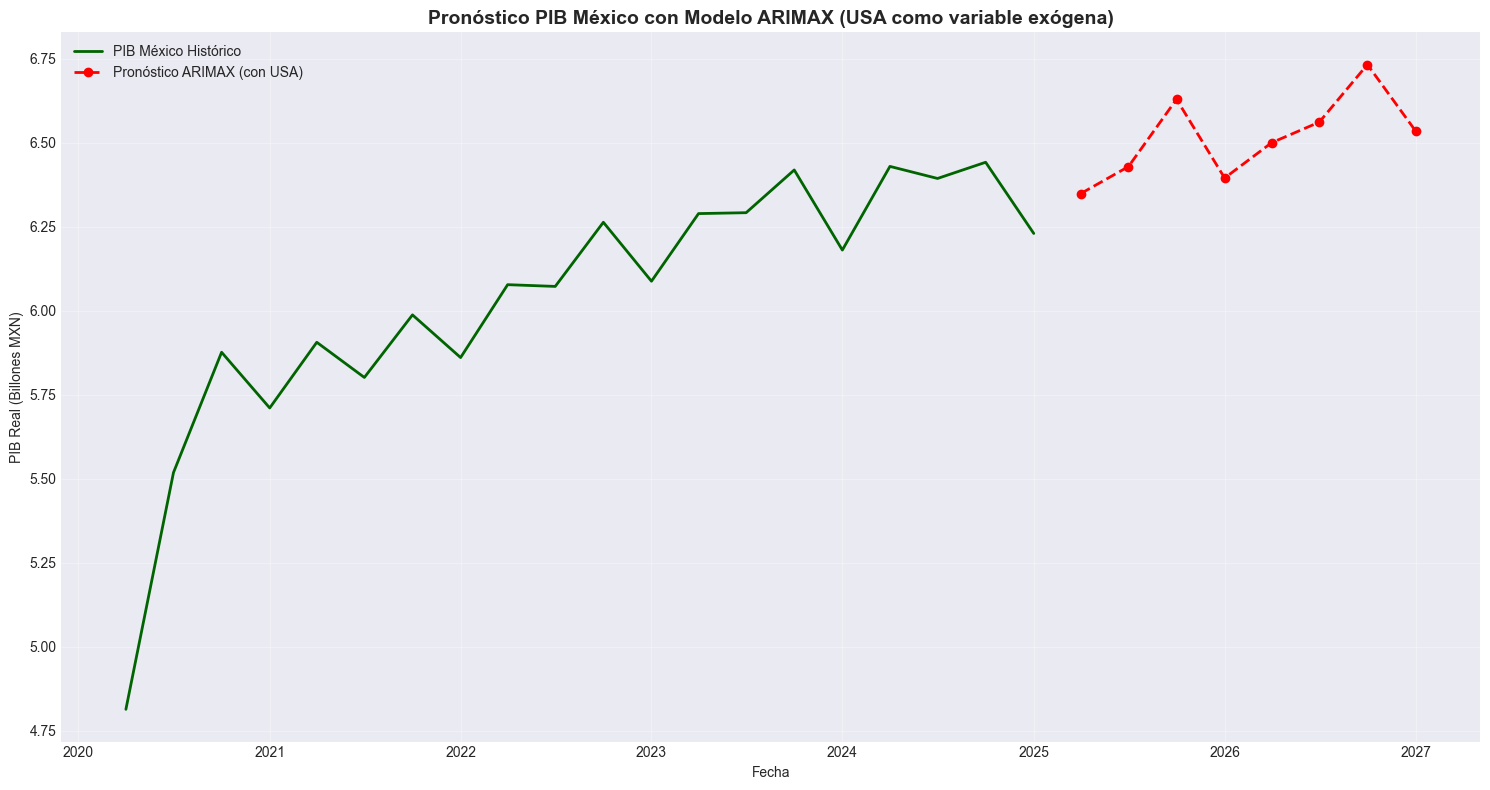

Pronóstico completado considerando la influencia de USA


In [61]:
# Pronóstico con el modelo ARIMAX
print("PRONÓSTICO CON MODELO ARIMAX\n")

# Para pronosticar necesitamos valores futuros de USA
# Primero pronosticamos USA (en logaritmos)
forecast_usa_raw = resultado_usa.get_forecast(steps=8)
forecast_usa_log = forecast_usa_raw.predicted_mean

# Necesitamos calcular el crecimiento anual combinando histórico + pronóstico
# Concatenamos los últimos valores históricos con el pronóstico
us_gdp_extended = pd.concat([us_gdp_log.iloc[-4:], forecast_usa_log])

# Ahora calculamos el crecimiento anual de los 8 períodos de pronóstico
us_future_growth = us_gdp_extended.diff(4).iloc[4:]  # Tomamos solo los 8 períodos futuros

# Ahora usamos eso para pronosticar México
forecast_mx_arimax = resultado_arimax.get_forecast(steps=8, exog=us_future_growth)
forecast_mx_mean = np.exp(forecast_mx_arimax.predicted_mean)

# Visualización final
plt.figure(figsize=(15, 8))

# Histórico
plt.plot(mxgdpdf.index[-20:], mxgdpdf['MXGDP'].iloc[-20:]/1000000,
         label='PIB México Histórico', color='darkgreen', linewidth=2)

# Pronóstico ARIMAX
plt.plot(forecast_mx_mean.index, forecast_mx_mean/1000000,
         label='Pronóstico ARIMAX (con USA)', color='red', 
         linewidth=2, linestyle='--', marker='o')

plt.title('Pronóstico PIB México con Modelo ARIMAX (USA como variable exógena)',
         fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('PIB Real (Billones MXN)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Pronóstico completado considerando la influencia de USA")
